# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [1]:
#imports 
!pip install plotnine
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



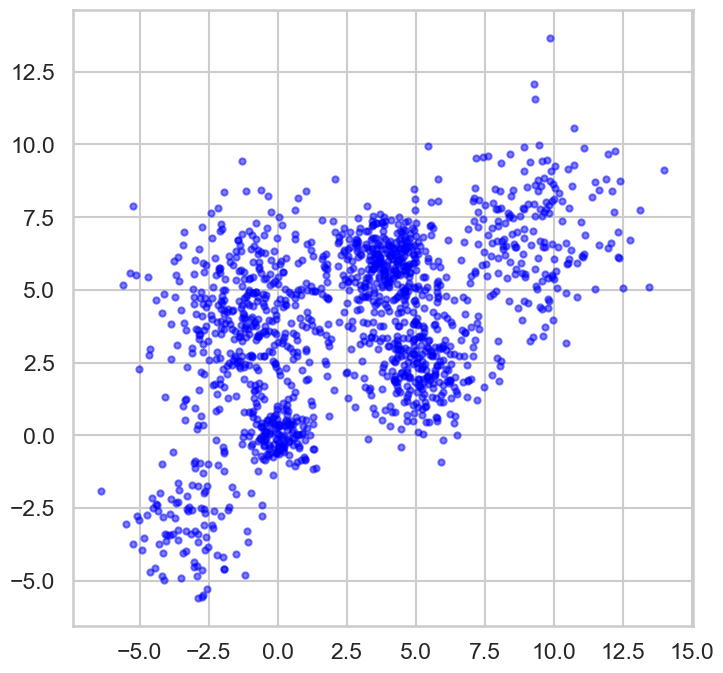

In [3]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

There are 6 overlapping clusters. 
Some clusters are more compact (less spread), while others are more dispersed. 
A few clusters overlap heavily, especially in the central area, making them hard to visually separate.

### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

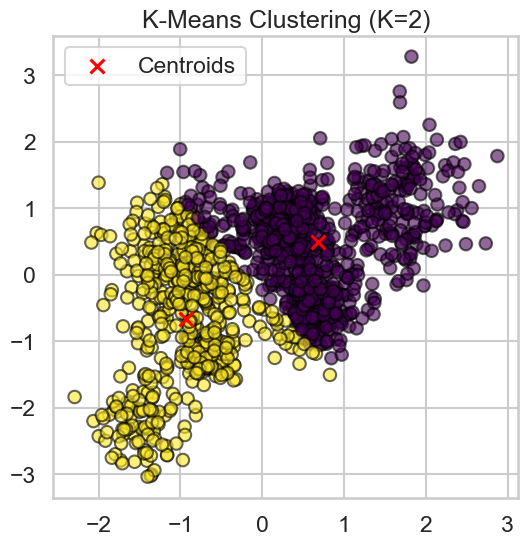

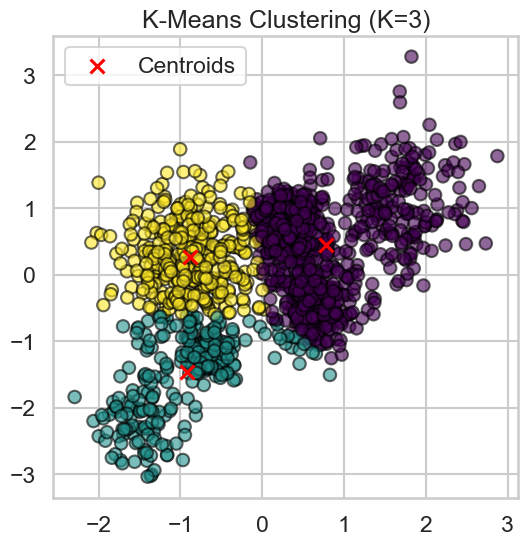

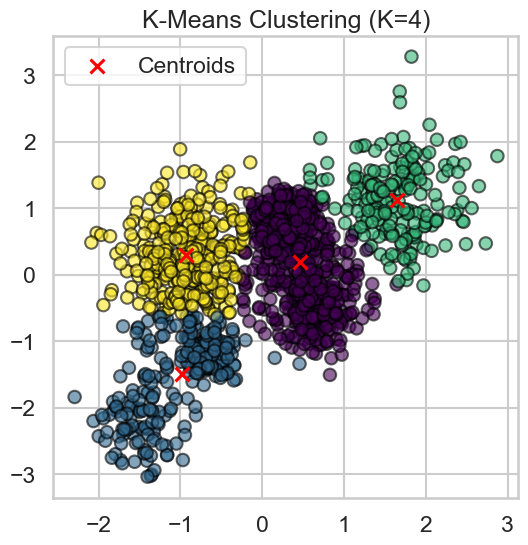

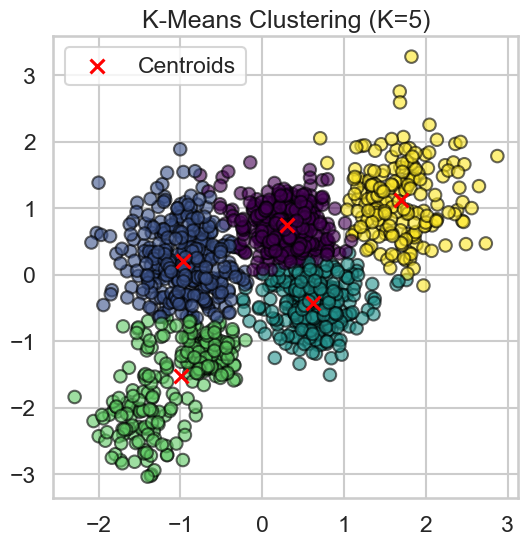

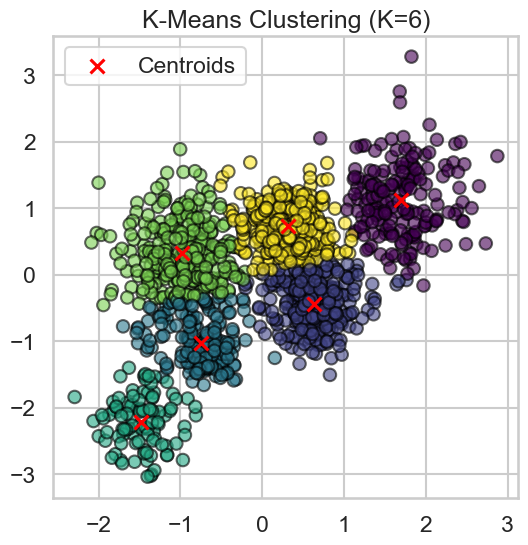

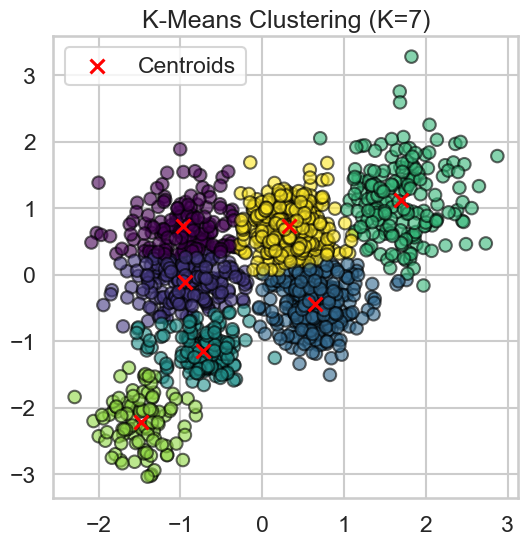

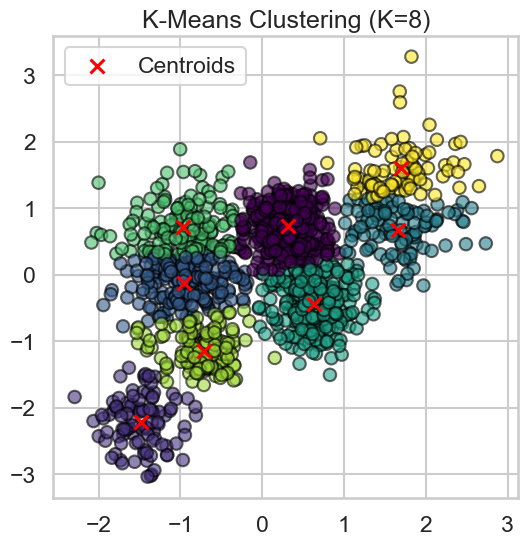

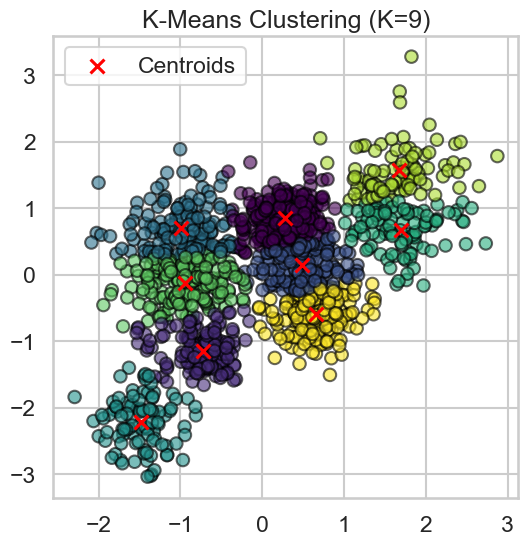

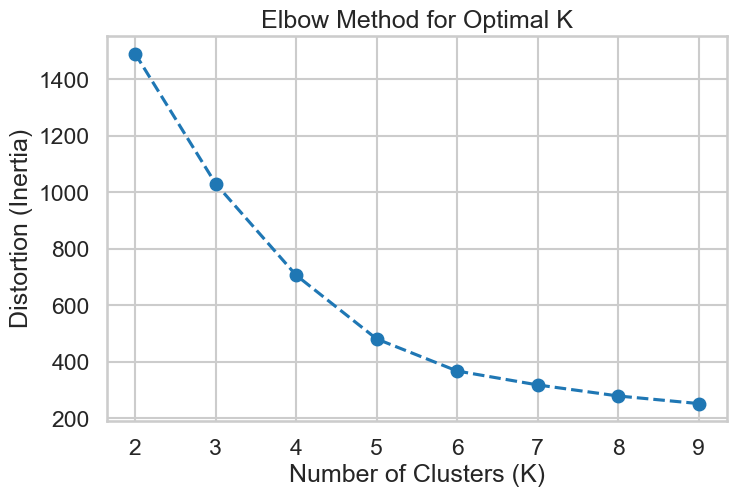

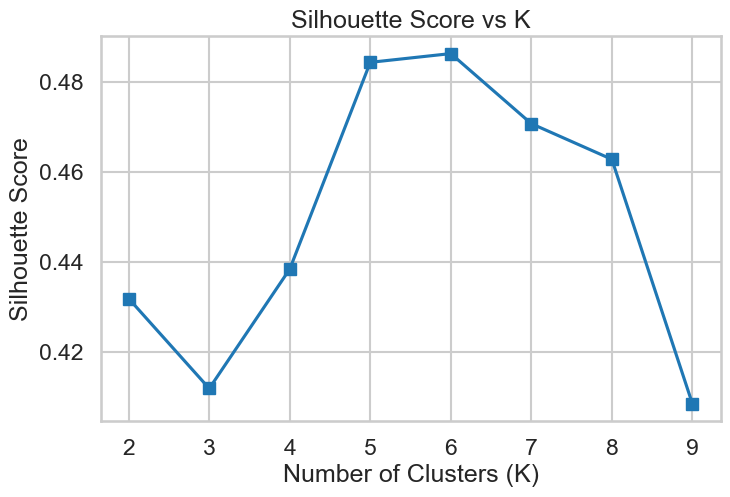

Best K: 6


In [4]:
#kmeans clustering for dataset 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(Multi_blob_Data) #scaling the data
from sklearn.cluster import KMeans
K_values = range(2, 10) #trying k values from 2 to 10
distortions = []
silhouette_scores = {}
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_X)
    
    # Compute distortion (inertia)
    distortions.append(kmeans.inertia_)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(scaled_X, labels)
    silhouette_scores[k] = silhouette_avg

    # Plot clusters
    plt.figure(figsize=(6, 6))
    plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(f'K-Means Clustering (K={k})')
    plt.legend()
    plt.show()

# Plot distortion function vs K
plt.figure(figsize=(8, 5))
plt.plot(K_values, distortions, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(K_values, list(silhouette_scores.values()), marker='s', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.show()

# Choose the best K based on silhouette score
best_K = max(silhouette_scores, key=silhouette_scores.get)
best_silhouette_score = silhouette_scores[best_K]

print(f'Best K: {best_K}')



We can see from elbow method that as the K increases the distortion decreases but that doesnt mean that the hightest K (K=9) gives the best results.
When we look at the silhouette score plot we can see that as K exceeds 6 the silhouette scores starts tp decrease.
From these two plots we can conclude that K=6 gives the best results.

The silhouette score is a metric used to evaluate how well data points have been clustered. It tells you how similar a point is to its own cluster compared to other clusters. The score ranges from -1 to 1.

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

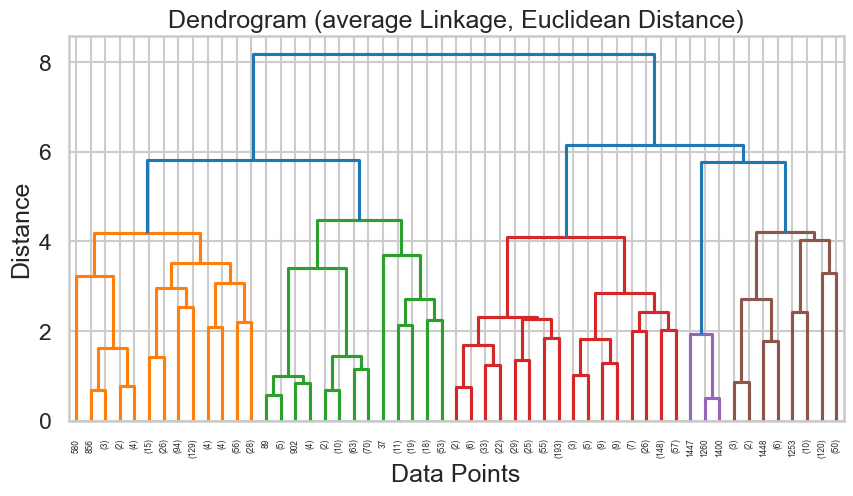

Best Parameters: Affinity=manhattan, Linkage=average, Distance Threshold=10
Best Silhouette Score: 0.4676


In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Generate synthetic data
centers = [(-3, -3), (0, 0), (5, 2.5), (-1, 4), (4, 6), (9, 7)]
Multi_blob_Data, y = make_blobs(n_samples=[100, 150, 300, 400, 300, 200], 
                                n_features=2, cluster_std=[1.3, 0.6, 1.2, 1.7, 0.9, 1.7],
                                centers=centers, shuffle=False, random_state=42)

# Define the parameters to test
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['complete', 'average', 'single']
distance_thresholds = [5, 10, 15] 

# Store results
best_silhouette = -1
best_params = None
silhouette_scores_hierarchical = {}

# Loop through different parameter combinations
for affinity in affinities:
    for linkage_method in linkages:
        for dist_thresh in distance_thresholds:
            try:
                # Ward linkage requires Euclidean distance only
                if linkage_method == 'ward' and affinity != 'euclidean':
                    continue

                # Perform Agglomerative Clustering
                clustering = AgglomerativeClustering(
                    affinity=affinity, linkage=linkage_method, distance_threshold=dist_thresh, n_clusters=None
                )
                labels = clustering.fit_predict(Multi_blob_Data)

                # Calculate silhouette score (only if more than 1 cluster is formed)
                if len(set(labels)) > 1:
                    score = silhouette_score(Multi_blob_Data, labels)
                    silhouette_scores_hierarchical[(affinity, linkage_method, dist_thresh)] = score

                    # Update best parameters if a better silhouette score is found
                    if score > best_silhouette:
                        best_silhouette = score
                        best_params = (affinity, linkage_method, dist_thresh)



            except Exception as e:
                print(f"Error with Affinity={affinity}, Linkage={linkage_method}, Threshold={dist_thresh}: {e}")


plt.figure(figsize=(10, 5))
linked = linkage(Multi_blob_Data, method='average')
dendrogram(linked, truncate_mode='level', p=5)  # Truncate to avoid too many leaves
plt.title('Dendrogram (average Linkage, Euclidean Distance)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Display best parameters and silhouette score
print(f"Best Parameters: Affinity={best_params[0]}, Linkage={best_params[1]}, Distance Threshold={best_params[2]}")
print(f"Best Silhouette Score: {best_silhouette:.4f}")


### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

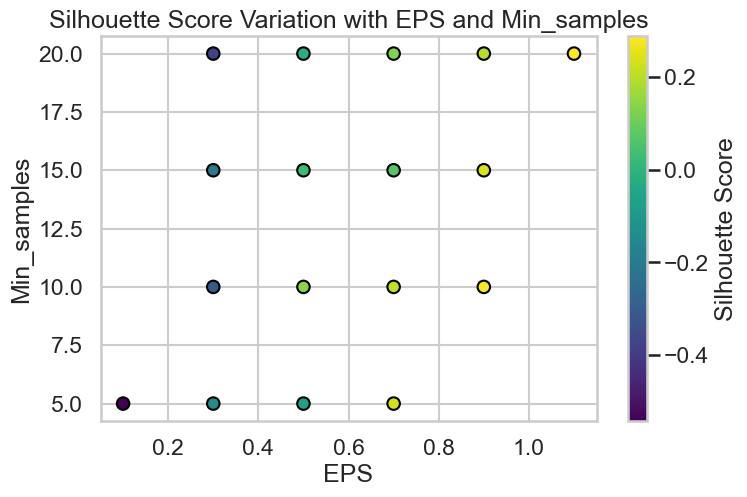

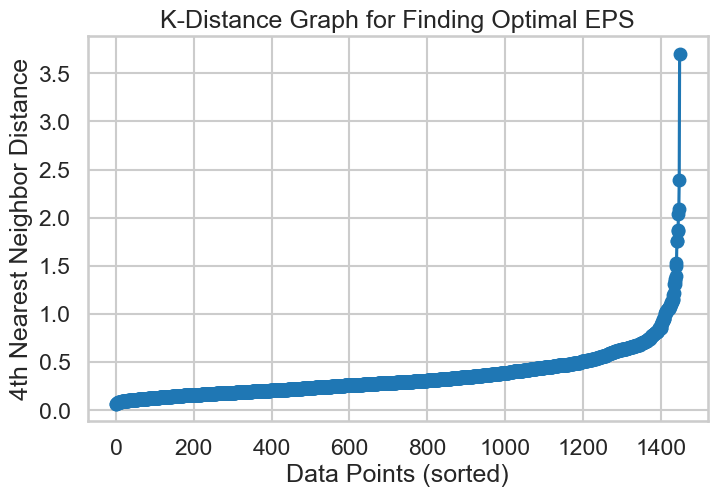

Best Parameters: EPS=1.1000000000000003, Min_samples=20
Best Silhouette Score: 0.2883


In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

# Generate synthetic data
centers = [(-3, -3), (0, 0), (5, 2.5), (-1, 4), (4, 6), (9, 7)]
Multi_blob_Data, y = make_blobs(n_samples=[100, 150, 300, 400, 300, 200], 
                                n_features=2, cluster_std=[1.3, 0.6, 1.2, 1.7, 0.9, 1.7],
                                centers=centers, shuffle=False, random_state=42)

# Define range for EPS and Min_samples
eps_values = np.arange(0.1, 3.0, 0.2)  # EPS from 0.1 to 3 with step 0.2
min_samples_values = range(5, 25, 5)  # Min_samples from 5 to 25 with step 5

# Store results
best_silhouette_dbscan = -1
best_params_dbscan = None
silhouette_scores_dbscan = {}

# Loop through different parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        try:
            # Apply DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(Multi_blob_Data)

            # Ensure DBSCAN forms at least 2 clusters (excluding noise)
            unique_labels = set(labels) - {-1}
            if len(unique_labels) > 1:
                score = silhouette_score(Multi_blob_Data, labels)
                silhouette_scores_dbscan[(eps, min_samples)] = score

                # Update best parameters if a better silhouette score is found
                if score > best_silhouette_dbscan:
                    best_silhouette_dbscan = score
                    best_params_dbscan = (eps, min_samples)

            
        except Exception as e:
            print(f"Error with EPS={eps}, Min_samples={min_samples}: {e}")

# Plot the silhouette score vs variations in EPS and Min_samples
if silhouette_scores_dbscan:
    eps_list, min_samples_list, scores = zip(*[(eps, min_samples, score) for (eps, min_samples), score in silhouette_scores_dbscan.items()])

    fig, ax = plt.subplots(figsize=(8, 5))
    sc = ax.scatter(eps_list, min_samples_list, c=scores, cmap='viridis', marker='o', edgecolors='k')
    plt.colorbar(sc, label='Silhouette Score')
    ax.set_xlabel('EPS')
    ax.set_ylabel('Min_samples')
    ax.set_title('Silhouette Score Variation with EPS and Min_samples')
    plt.show()

# Apply K-Distance Graph method to find optimal EPS
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(Multi_blob_Data)
distances, indices = neighbors.kneighbors(Multi_blob_Data)
sorted_distances = np.sort(distances[:, 4])  # 4th neighbor for k-distance

plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, marker='o', linestyle='-')
plt.xlabel('Data Points (sorted)')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-Distance Graph for Finding Optimal EPS')
plt.show()

# Display best parameters and silhouette score for DBSCAN
print(f"Best Parameters: EPS={best_params_dbscan[0]}, Min_samples={best_params_dbscan[1]}")
print(f"Best Silhouette Score: {best_silhouette_dbscan:.4f}")


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


In [7]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

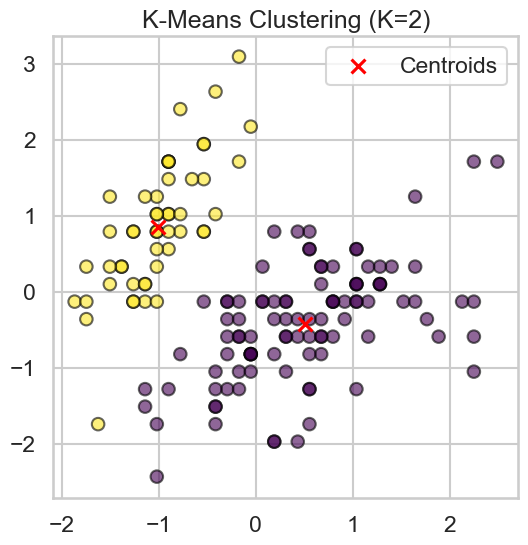

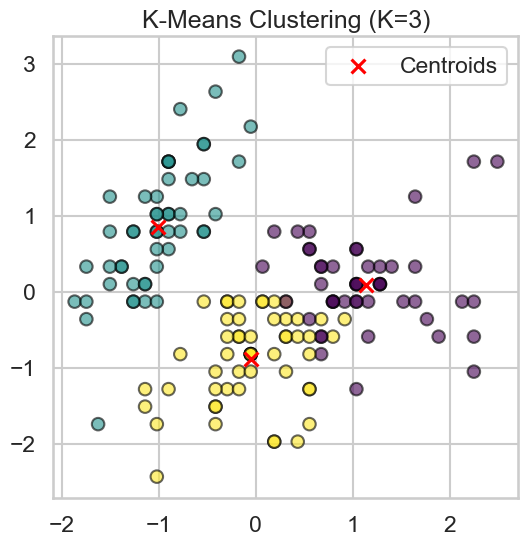

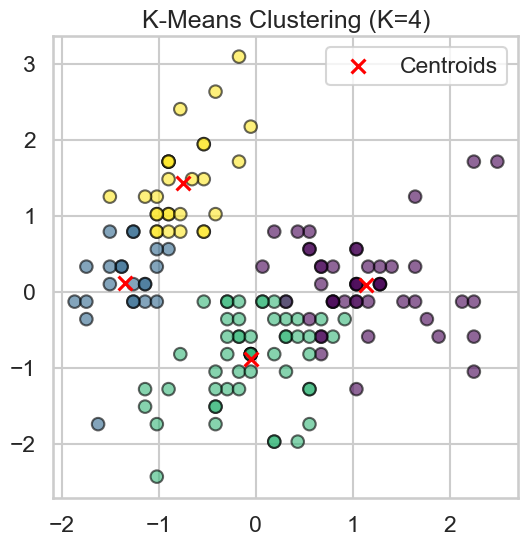

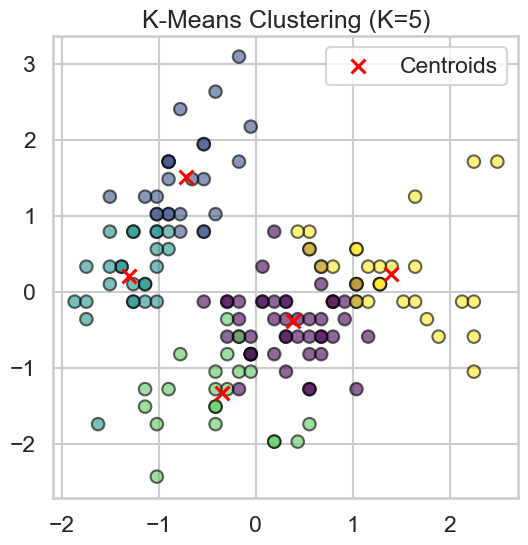

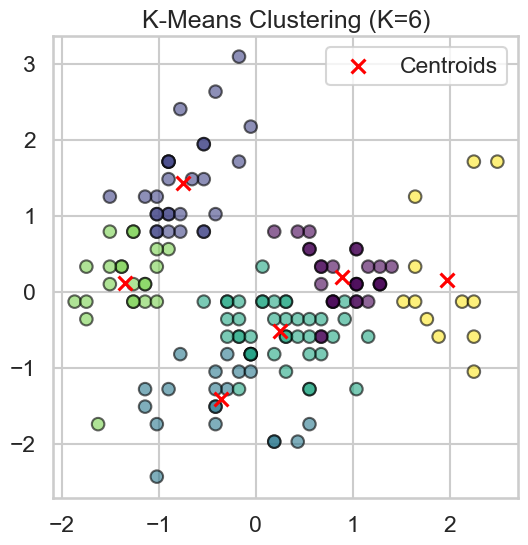

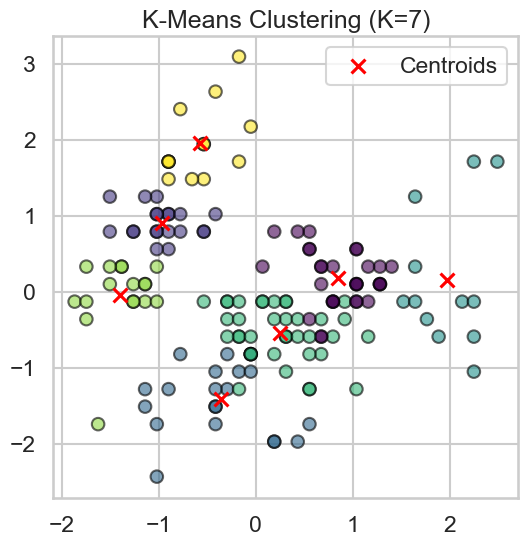

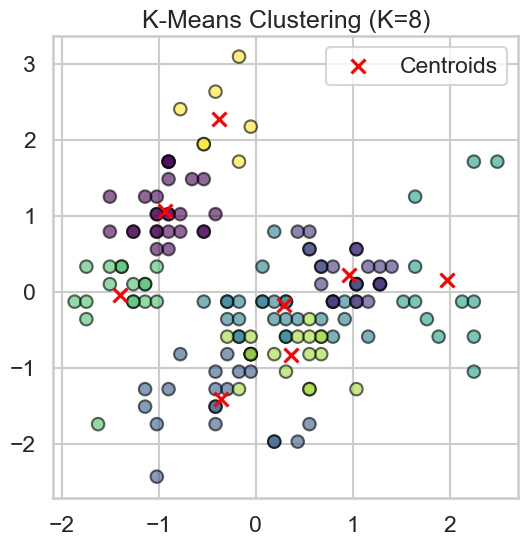

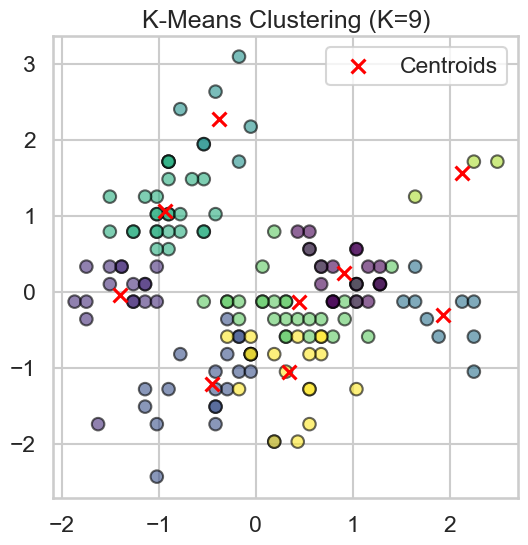

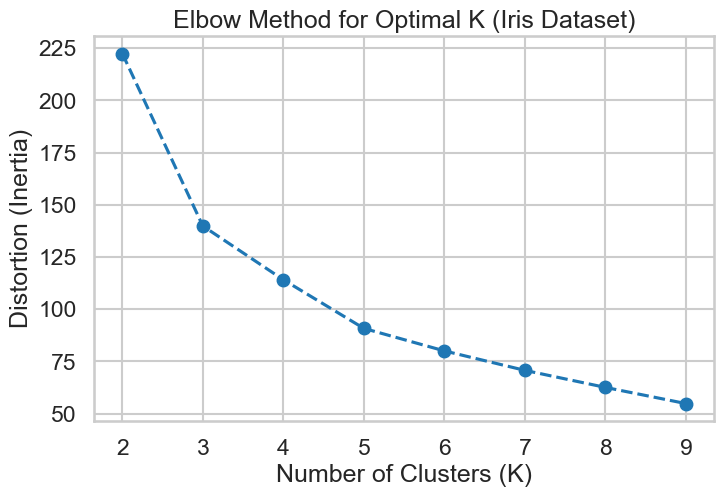

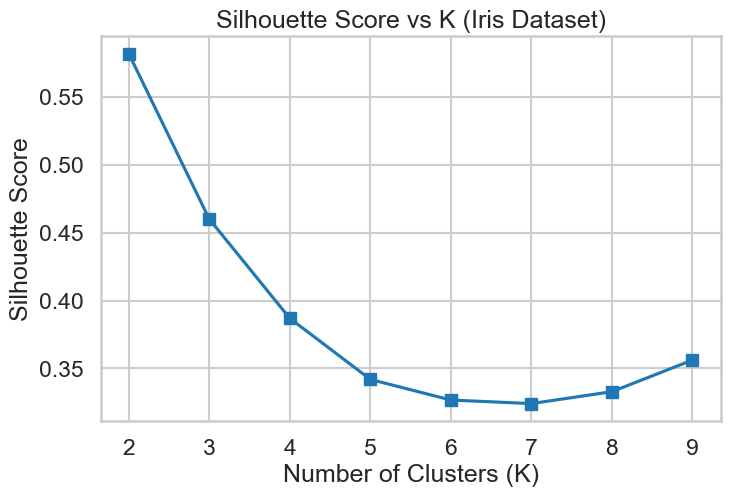

Best K: 2
Best Silhouette Score: 0.5818


In [8]:
#kmeans with scaling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
X_iris = iris_data.data  # Features
y_iris = iris_data.target  # True class labels

# Standardize the data
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Define range for K
K_values = range(2, 10)  # Testing K from 2 to 9

# Store metrics
distortions_iris = []
silhouette_scores_iris = {}

# Apply KMeans for different K values
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_iris_scaled)
    
    # Compute distortion (inertia)
    distortions_iris.append(kmeans.inertia_)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_iris_scaled, labels)
    silhouette_scores_iris[k] = silhouette_avg

    # Plot clusters (first two principal components for visualization)
    plt.figure(figsize=(6, 6))
    plt.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(f'K-Means Clustering (K={k})')
    plt.legend()
    plt.show()

# Plot distortion function vs K (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(K_values, distortions_iris, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K (Iris Dataset)')
plt.show()

# Plot silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(K_values, list(silhouette_scores_iris.values()), marker='s', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K (Iris Dataset)')
plt.show()

# Choose the best K based on silhouette score
best_K_iris = max(silhouette_scores_iris, key=silhouette_scores_iris.get)
best_silhouette_iris = silhouette_scores_iris[best_K_iris]

# Print the best K and its silhouette score
print(f'Best K: {best_K_iris}')
print(f'Best Silhouette Score: {best_silhouette_iris:.4f}')


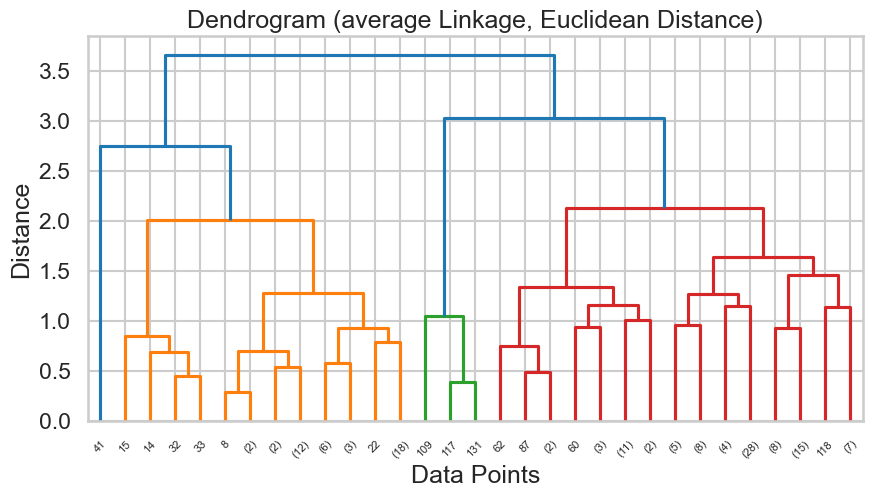

Best Parameters: Affinity=manhattan, Linkage=average, Distance Threshold=5
Best Silhouette Score: 0.5818


In [9]:
#agglomerative clustering with scaling
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data = load_iris()
X_iris = iris_data.data  # Features
y_iris = iris_data.target  # True class labels

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Define parameters to test
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['complete', 'average', 'single']
distance_thresholds = [2, 5, 10]  # Different distance thresholds

# Store results
best_silhouette_hierarchical = -1
best_params_hierarchical = None
silhouette_scores_hierarchical = {}

# Loop through different combinations of affinity, linkage, and threshold
for affinity in affinities:
    for linkage_method in linkages:
        for dist_thresh in distance_thresholds:
            try:
                # Ward linkage only supports Euclidean distance
                if linkage_method == 'ward' and affinity != 'euclidean':
                    continue

                # Perform Agglomerative Clustering
                clustering = AgglomerativeClustering(
                    affinity=affinity, linkage=linkage_method, distance_threshold=dist_thresh, n_clusters=None
                )
                labels = clustering.fit_predict(X_iris_scaled)

                # Compute silhouette score (only if more than 1 cluster is formed)
                if len(set(labels)) > 1:
                    score = silhouette_score(X_iris_scaled, labels)
                    silhouette_scores_hierarchical[(affinity, linkage_method, dist_thresh)] = score

                    # Update best parameters if a better silhouette score is found
                    if score > best_silhouette_hierarchical:
                        best_silhouette_hierarchical = score
                        best_params_hierarchical = (affinity, linkage_method, dist_thresh)

                
            except Exception as e:
                print(f"Error with Affinity={affinity}, Linkage={linkage_method}, Threshold={dist_thresh}: {e}")

# Plot dendrogram for one trial (Euclidean, Ward linkage)
plt.figure(figsize=(10, 5))
linked = linkage(X_iris_scaled, method='average')
dendrogram(linked, truncate_mode='level', p=5)  # Truncate to avoid too many leaves
plt.title('Dendrogram (average Linkage, Euclidean Distance)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Display best parameters and silhouette score for Agglomerative Clustering
print(f"Best Parameters: Affinity={best_params_hierarchical[0]}, Linkage={best_params_hierarchical[1]}, Distance Threshold={best_params_hierarchical[2]}")
print(f"Best Silhouette Score: {best_silhouette_hierarchical:.4f}")


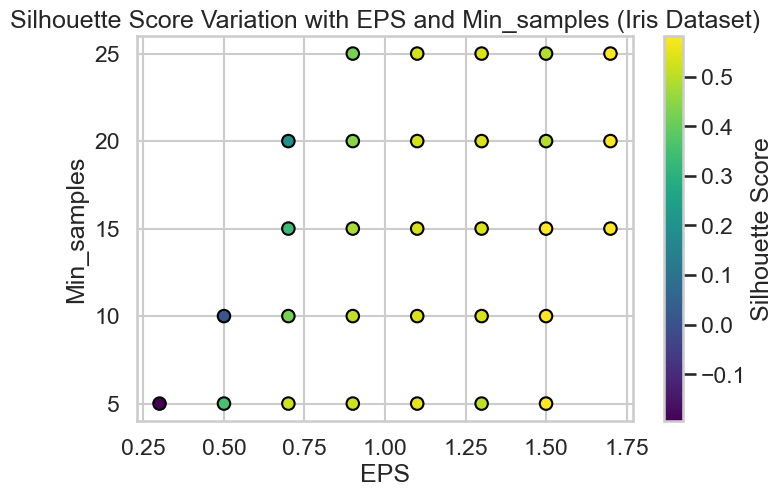

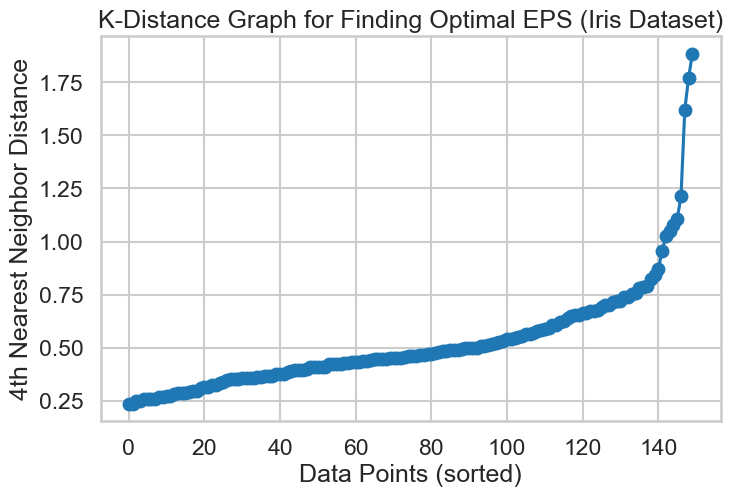

Best Parameters: EPS=1.5000000000000004, Min_samples=5
Best Silhouette Score: 0.5818


In [10]:
#dbscan with scaling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data = load_iris()
X_iris = iris_data.data  # Features
y_iris = iris_data.target  # True class labels

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Define range for EPS and Min_samples
eps_values = np.arange(0.1, 3.1, 0.2)  # EPS from 0.1 to 3 with step 0.2
min_samples_values = range(5, 26, 5)  # Min_samples from 5 to 25 with step 5

# Store results
best_silhouette_dbscan = -1
best_params_dbscan = None
silhouette_scores_dbscan = {}

# Loop through different parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        try:
            # Apply DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_iris_scaled)

            # Ensure DBSCAN forms at least 2 clusters (excluding noise)
            unique_labels = set(labels) - {-1}
            if len(unique_labels) > 1:
                score = silhouette_score(X_iris_scaled, labels)
                silhouette_scores_dbscan[(eps, min_samples)] = score

                # Update best parameters if a better silhouette score is found
                if score > best_silhouette_dbscan:
                    best_silhouette_dbscan = score
                    best_params_dbscan = (eps, min_samples)

            
        except Exception as e:
            print(f"Error with EPS={eps}, Min_samples={min_samples}: {e}")

# Plot the silhouette score vs variations in EPS and Min_samples
if silhouette_scores_dbscan:
    eps_list, min_samples_list, scores = zip(*[(eps, min_samples, score) for (eps, min_samples), score in silhouette_scores_dbscan.items()])

    fig, ax = plt.subplots(figsize=(8, 5))
    sc = ax.scatter(eps_list, min_samples_list, c=scores, cmap='viridis', marker='o', edgecolors='k')
    plt.colorbar(sc, label='Silhouette Score')
    ax.set_xlabel('EPS')
    ax.set_ylabel('Min_samples')
    ax.set_title('Silhouette Score Variation with EPS and Min_samples (Iris Dataset)')
    plt.show()

# Apply K-Distance Graph method to find optimal EPS
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X_iris_scaled)
distances, indices = neighbors.kneighbors(X_iris_scaled)
sorted_distances = np.sort(distances[:, 4])  # 4th neighbor for k-distance

plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, marker='o', linestyle='-')
plt.xlabel('Data Points (sorted)')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-Distance Graph for Finding Optimal EPS (Iris Dataset)')
plt.show()

# Display best parameters and silhouette score for DBSCAN
print(f"Best Parameters: EPS={best_params_dbscan[0]}, Min_samples={best_params_dbscan[1]}")
print(f"Best Silhouette Score: {best_silhouette_dbscan:.4f}")


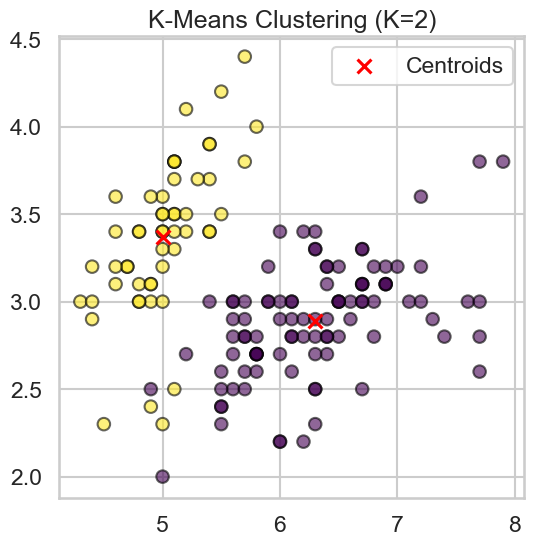

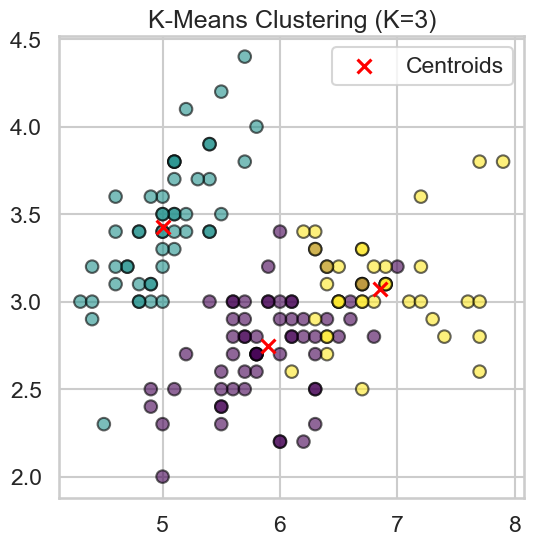

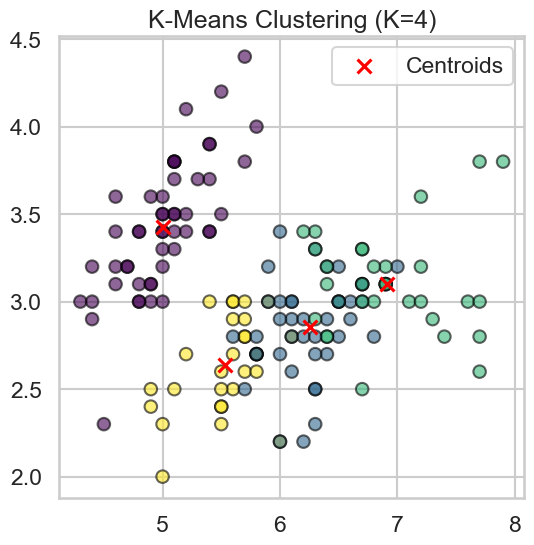

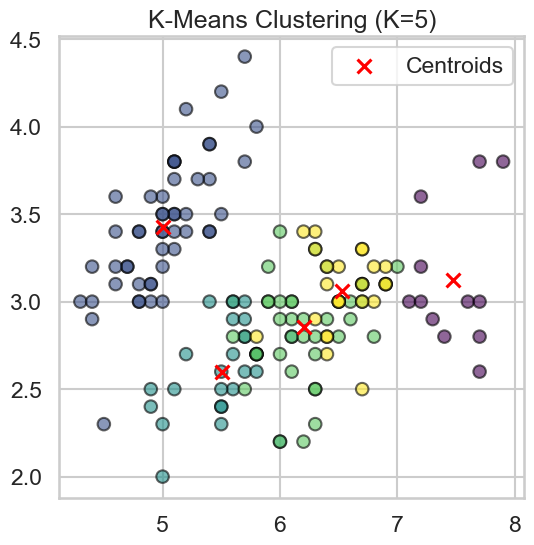

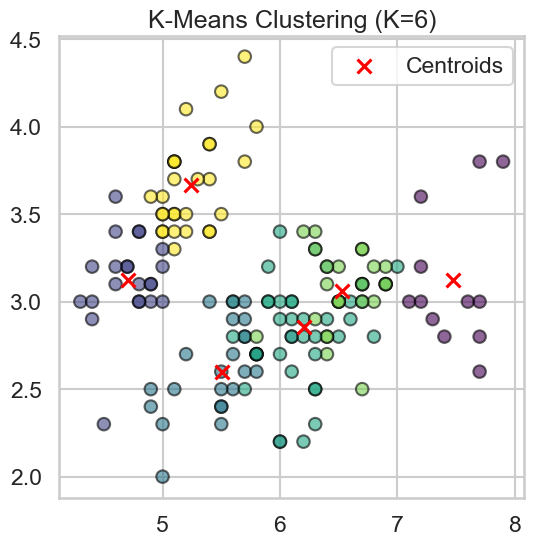

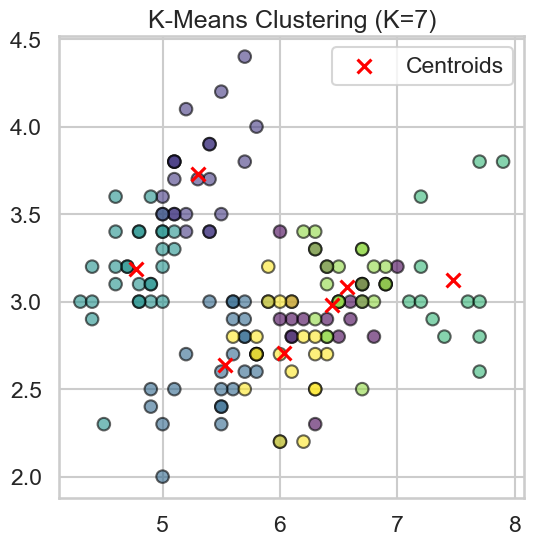

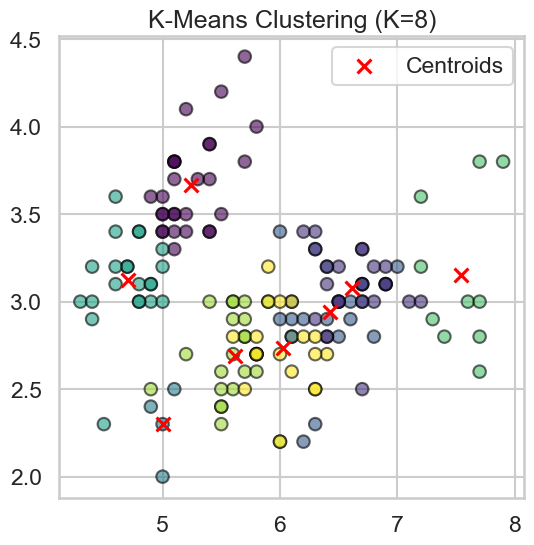

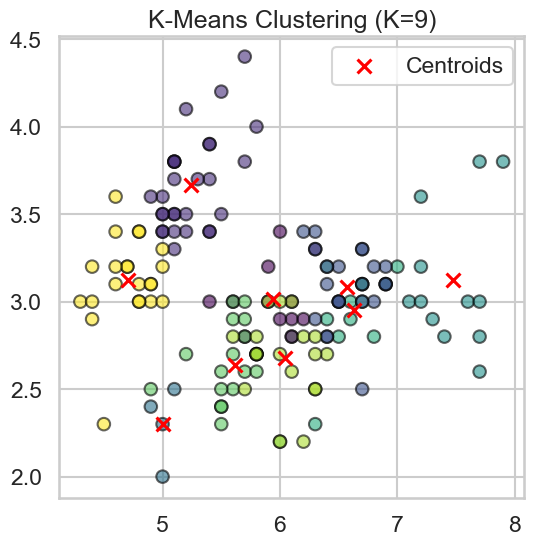

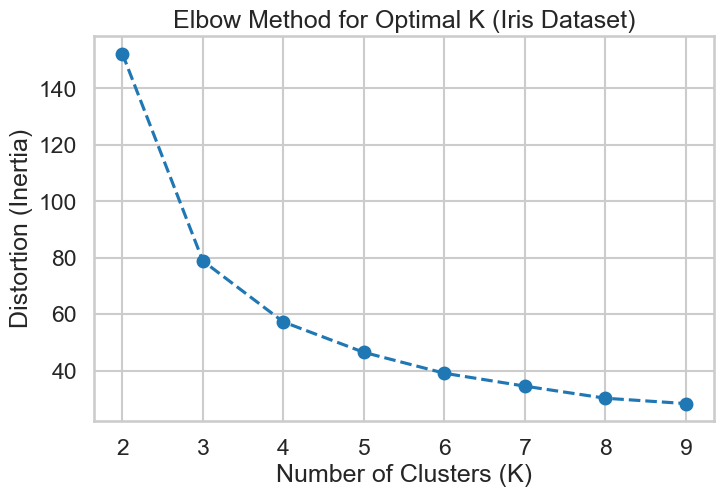

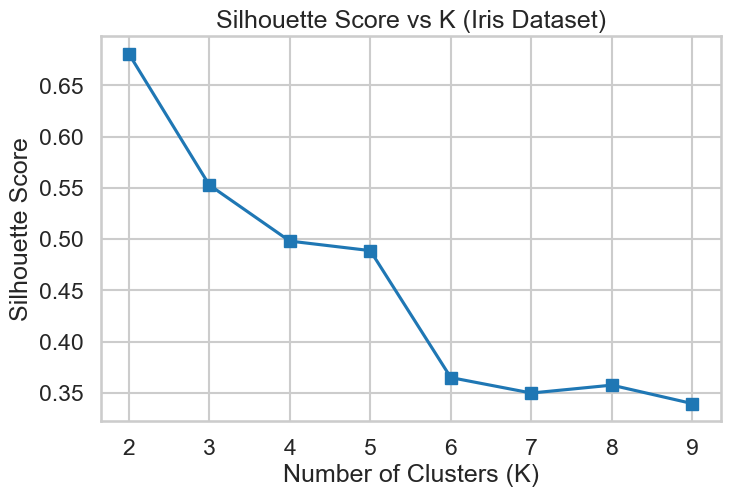

Best K: 2
Best Silhouette Score: 0.6810


In [11]:
#k-means without scaling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris


# Load the Iris dataset
X_iris = iris_data.data  
y_iris = iris_data.target  

# Define range for K
K_values = range(2, 10)  # Testing K from 2 to 9

# Store metrics
distortions_iris = []
silhouette_scores_iris = {}

# Apply KMeans for different K values
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_iris)
    
    # Compute distortion (inertia)
    distortions_iris.append(kmeans.inertia_)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_iris, labels)
    silhouette_scores_iris[k] = silhouette_avg

    # Plot clusters (first two principal components for visualization)
    plt.figure(figsize=(6, 6))
    plt.scatter(X_iris[:, 0], X_iris[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(f'K-Means Clustering (K={k})')
    plt.legend()
    plt.show()

# Plot distortion function vs K (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(K_values, distortions_iris, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K (Iris Dataset)')
plt.show()

# Plot silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(K_values, list(silhouette_scores_iris.values()), marker='s', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K (Iris Dataset)')
plt.show()

# Choose the best K based on silhouette score
best_K_iris = max(silhouette_scores_iris, key=silhouette_scores_iris.get)
best_silhouette_iris = silhouette_scores_iris[best_K_iris]

# Print the best K and its silhouette score
print(f'Best K: {best_K_iris}')
print(f'Best Silhouette Score: {best_silhouette_iris:.4f}')


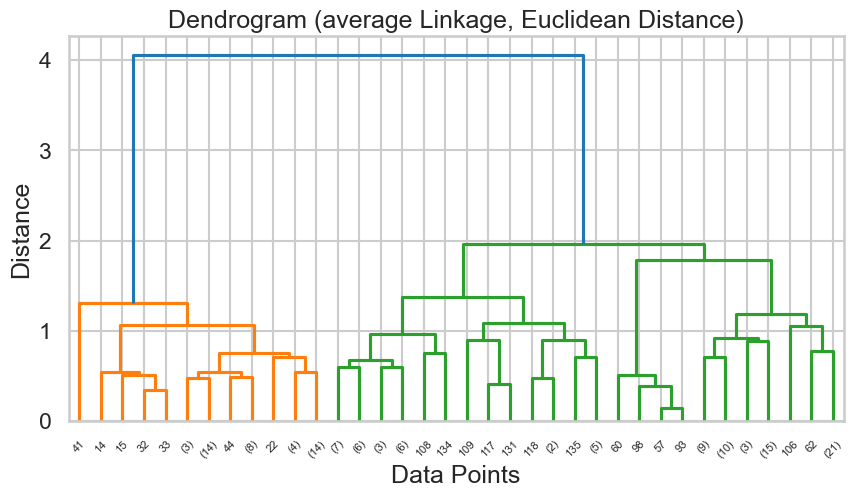

Best Parameters: Affinity=euclidean, Linkage=average, Distance Threshold=2
Best Silhouette Score: 0.6867


In [12]:
#agglomerative without scaling
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Load the Iris dataset
iris_data = load_iris()
X_iris = iris_data.data  
y_iris = iris_data.target  


# Define parameters to test
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['complete', 'average', 'single']
distance_thresholds = [2, 5, 10]  # Different distance thresholds

# Store results
best_silhouette_hierarchical = -1
best_params_hierarchical = None
silhouette_scores_hierarchical = {}

# Loop through different combinations of affinity, linkage, and threshold
for affinity in affinities:
    for linkage_method in linkages:
        for dist_thresh in distance_thresholds:
            try:
                # Ward linkage only supports Euclidean distance
                if linkage_method == 'ward' and affinity != 'euclidean':
                    continue

                # Perform Agglomerative Clustering
                clustering = AgglomerativeClustering(
                    affinity=affinity, linkage=linkage_method, distance_threshold=dist_thresh, n_clusters=None
                )
                labels = clustering.fit_predict(X_iris)

                # Compute silhouette score (only if more than 1 cluster is formed)
                if len(set(labels)) > 1:
                    score = silhouette_score(X_iris, labels)
                    silhouette_scores_hierarchical[(affinity, linkage_method, dist_thresh)] = score

                    # Update best parameters if a better silhouette score is found
                    if score > best_silhouette_hierarchical:
                        best_silhouette_hierarchical = score
                        best_params_hierarchical = (affinity, linkage_method, dist_thresh)

                   

            except Exception as e:
                print(f"Error with Affinity={affinity}, Linkage={linkage_method}, Threshold={dist_thresh}: {e}")

# Plot dendrogram for one trial (Euclidean, Ward linkage)
plt.figure(figsize=(10, 5))
linked = linkage(X_iris, method='average')
dendrogram(linked, truncate_mode='level', p=5)  # Truncate to avoid too many leaves
plt.title('Dendrogram (average Linkage, Euclidean Distance)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
# Display best parameters and silhouette score for Agglomerative Clustering
print(f"Best Parameters: Affinity={best_params_hierarchical[0]}, Linkage={best_params_hierarchical[1]}, Distance Threshold={best_params_hierarchical[2]}")
print(f"Best Silhouette Score: {best_silhouette_hierarchical:.4f}")


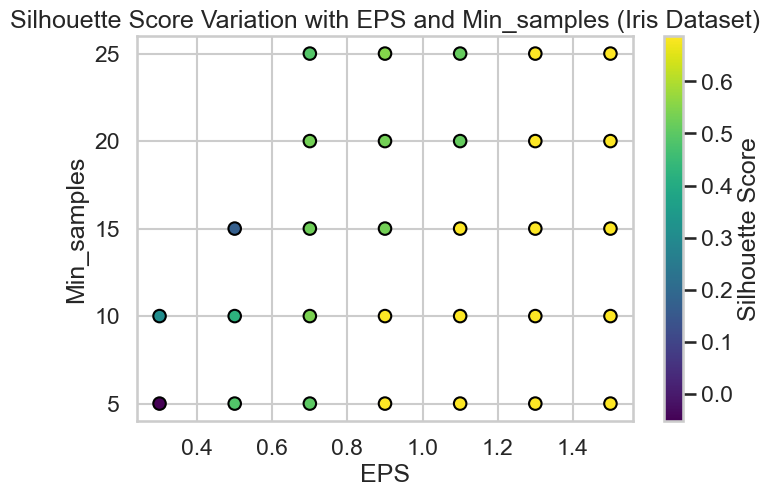

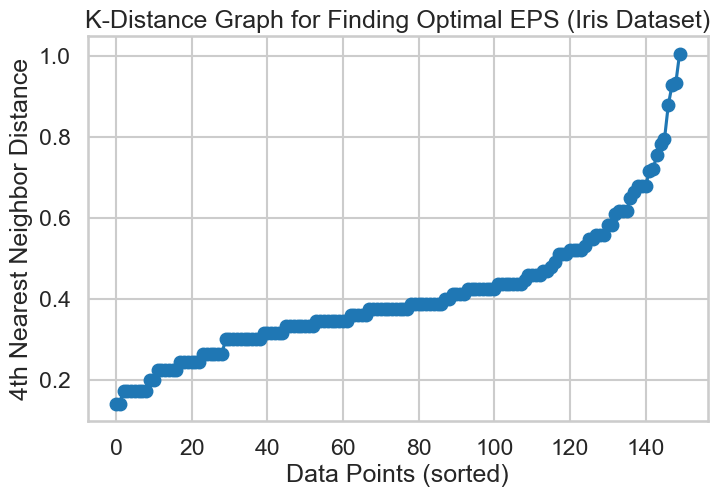

Best Parameters: EPS=0.9000000000000001, Min_samples=5
Best Silhouette Score: 0.6867


In [13]:
#dbscan without scaling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data = load_iris()
X_iris = iris_data.data  
y_iris = iris_data.target  


# Define range for EPS and Min_samples
eps_values = np.arange(0.1, 3.1, 0.2)  # EPS from 0.1 to 3 with step 0.2
min_samples_values = range(5, 26, 5)  # Min_samples from 5 to 25 with step 5

# Store results
best_silhouette_dbscan = -1
best_params_dbscan = None
silhouette_scores_dbscan = {}

# Loop through different parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        try:
            # Apply DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_iris)

            # Ensure DBSCAN forms at least 2 clusters (excluding noise)
            unique_labels = set(labels) - {-1}
            if len(unique_labels) > 1:
                score = silhouette_score(X_iris, labels)
                silhouette_scores_dbscan[(eps, min_samples)] = score

                # Update best parameters if a better silhouette score is found
                if score > best_silhouette_dbscan:
                    best_silhouette_dbscan = score
                    best_params_dbscan = (eps, min_samples)

              
        except Exception as e:
            print(f"Error with EPS={eps}, Min_samples={min_samples}: {e}")

# Plot the silhouette score vs variations in EPS and Min_samples
if silhouette_scores_dbscan:
    eps_list, min_samples_list, scores = zip(*[(eps, min_samples, score) for (eps, min_samples), score in silhouette_scores_dbscan.items()])

    fig, ax = plt.subplots(figsize=(8, 5))
    sc = ax.scatter(eps_list, min_samples_list, c=scores, cmap='viridis', marker='o', edgecolors='k')
    plt.colorbar(sc, label='Silhouette Score')
    ax.set_xlabel('EPS')
    ax.set_ylabel('Min_samples')
    ax.set_title('Silhouette Score Variation with EPS and Min_samples (Iris Dataset)')
    plt.show()

# Apply K-Distance Graph method to find optimal EPS
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X_iris)
distances, indices = neighbors.kneighbors(X_iris)
sorted_distances = np.sort(distances[:, 4])  # 4th neighbor for k-distance

plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, marker='o', linestyle='-')
plt.xlabel('Data Points (sorted)')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-Distance Graph for Finding Optimal EPS (Iris Dataset)')
plt.show()

# Display best parameters and silhouette score for DBSCAN
print(f"Best Parameters: EPS={best_params_dbscan[0]}, Min_samples={best_params_dbscan[1]}")
print(f"Best Silhouette Score: {best_silhouette_dbscan:.4f}")

for iris dataset agglomerative clustering and dbscan clustering without scaling gave the highest silhouette scores.

* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

## Customer dataset
Repeat all the above on the customer data set 

In [14]:
df = pd.read_csv('C:/Users/DELL/Desktop/MLproject/customer_data.csv', index_col= "ID")

In [15]:
df.head()

Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


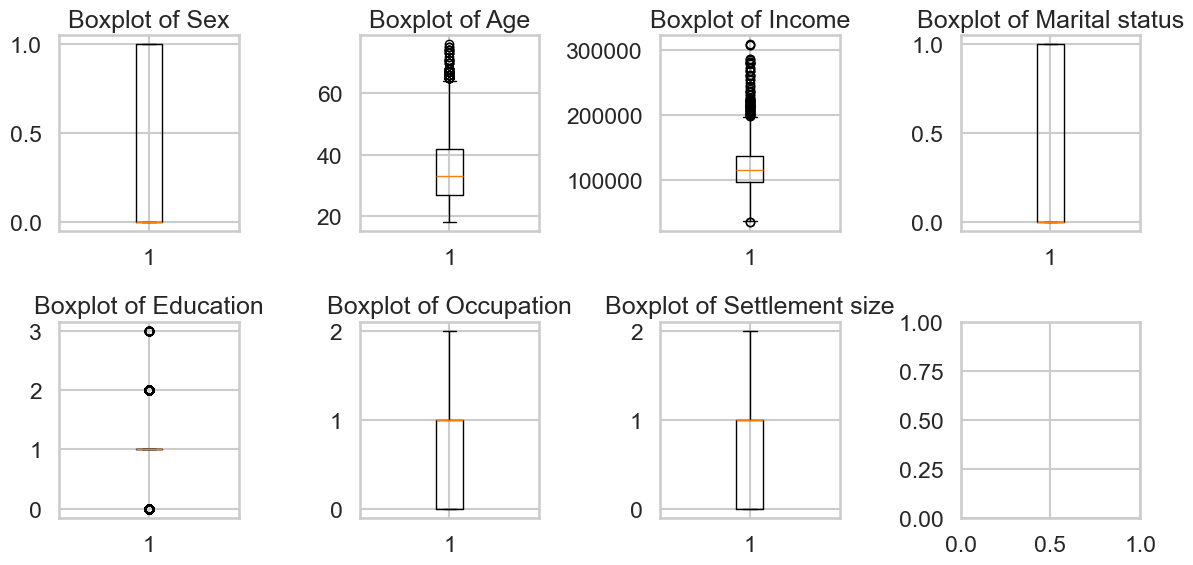

Outliers count: {'Sex': 0, 'Age': 11, 'Income': 31, 'Marital status': 0, 'Education': 36, 'Occupation': 0, 'Settlement size': 0}


In [17]:
def detect_outliers(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores > threshold]
numerical_features = ['Sex', 'Age', 'Income' , 'Marital status' , 'Education', 'Occupation' , 'Settlement size']
outliers = {col: detect_outliers(df, col) for col in numerical_features}

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))  # Adjust layout
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Display outliers count
outliers_count = {col: len(outliers[col]) for col in numerical_features}
print("Outliers count:", outliers_count)


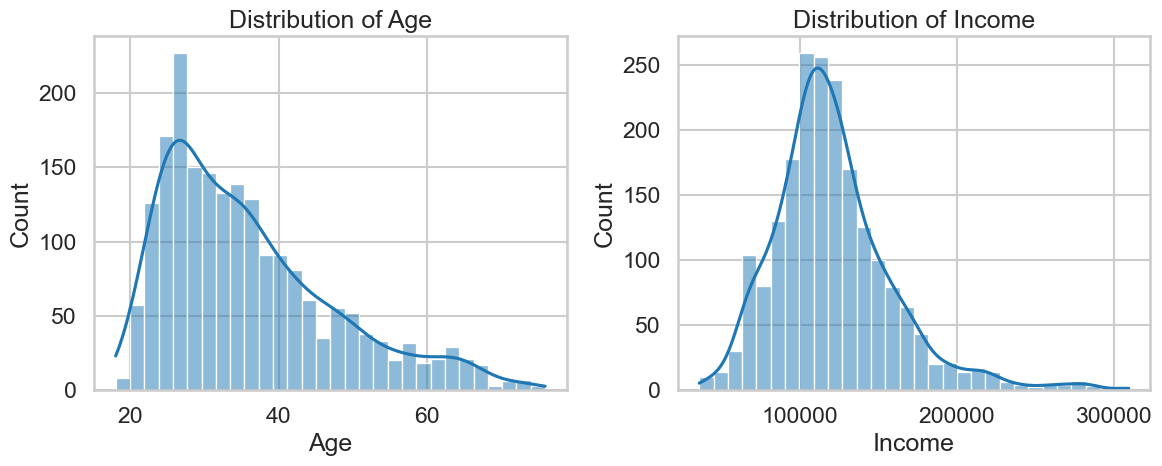

In [18]:
# Plot distribution of Age and Income
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Income')

plt.tight_layout()
plt.show()


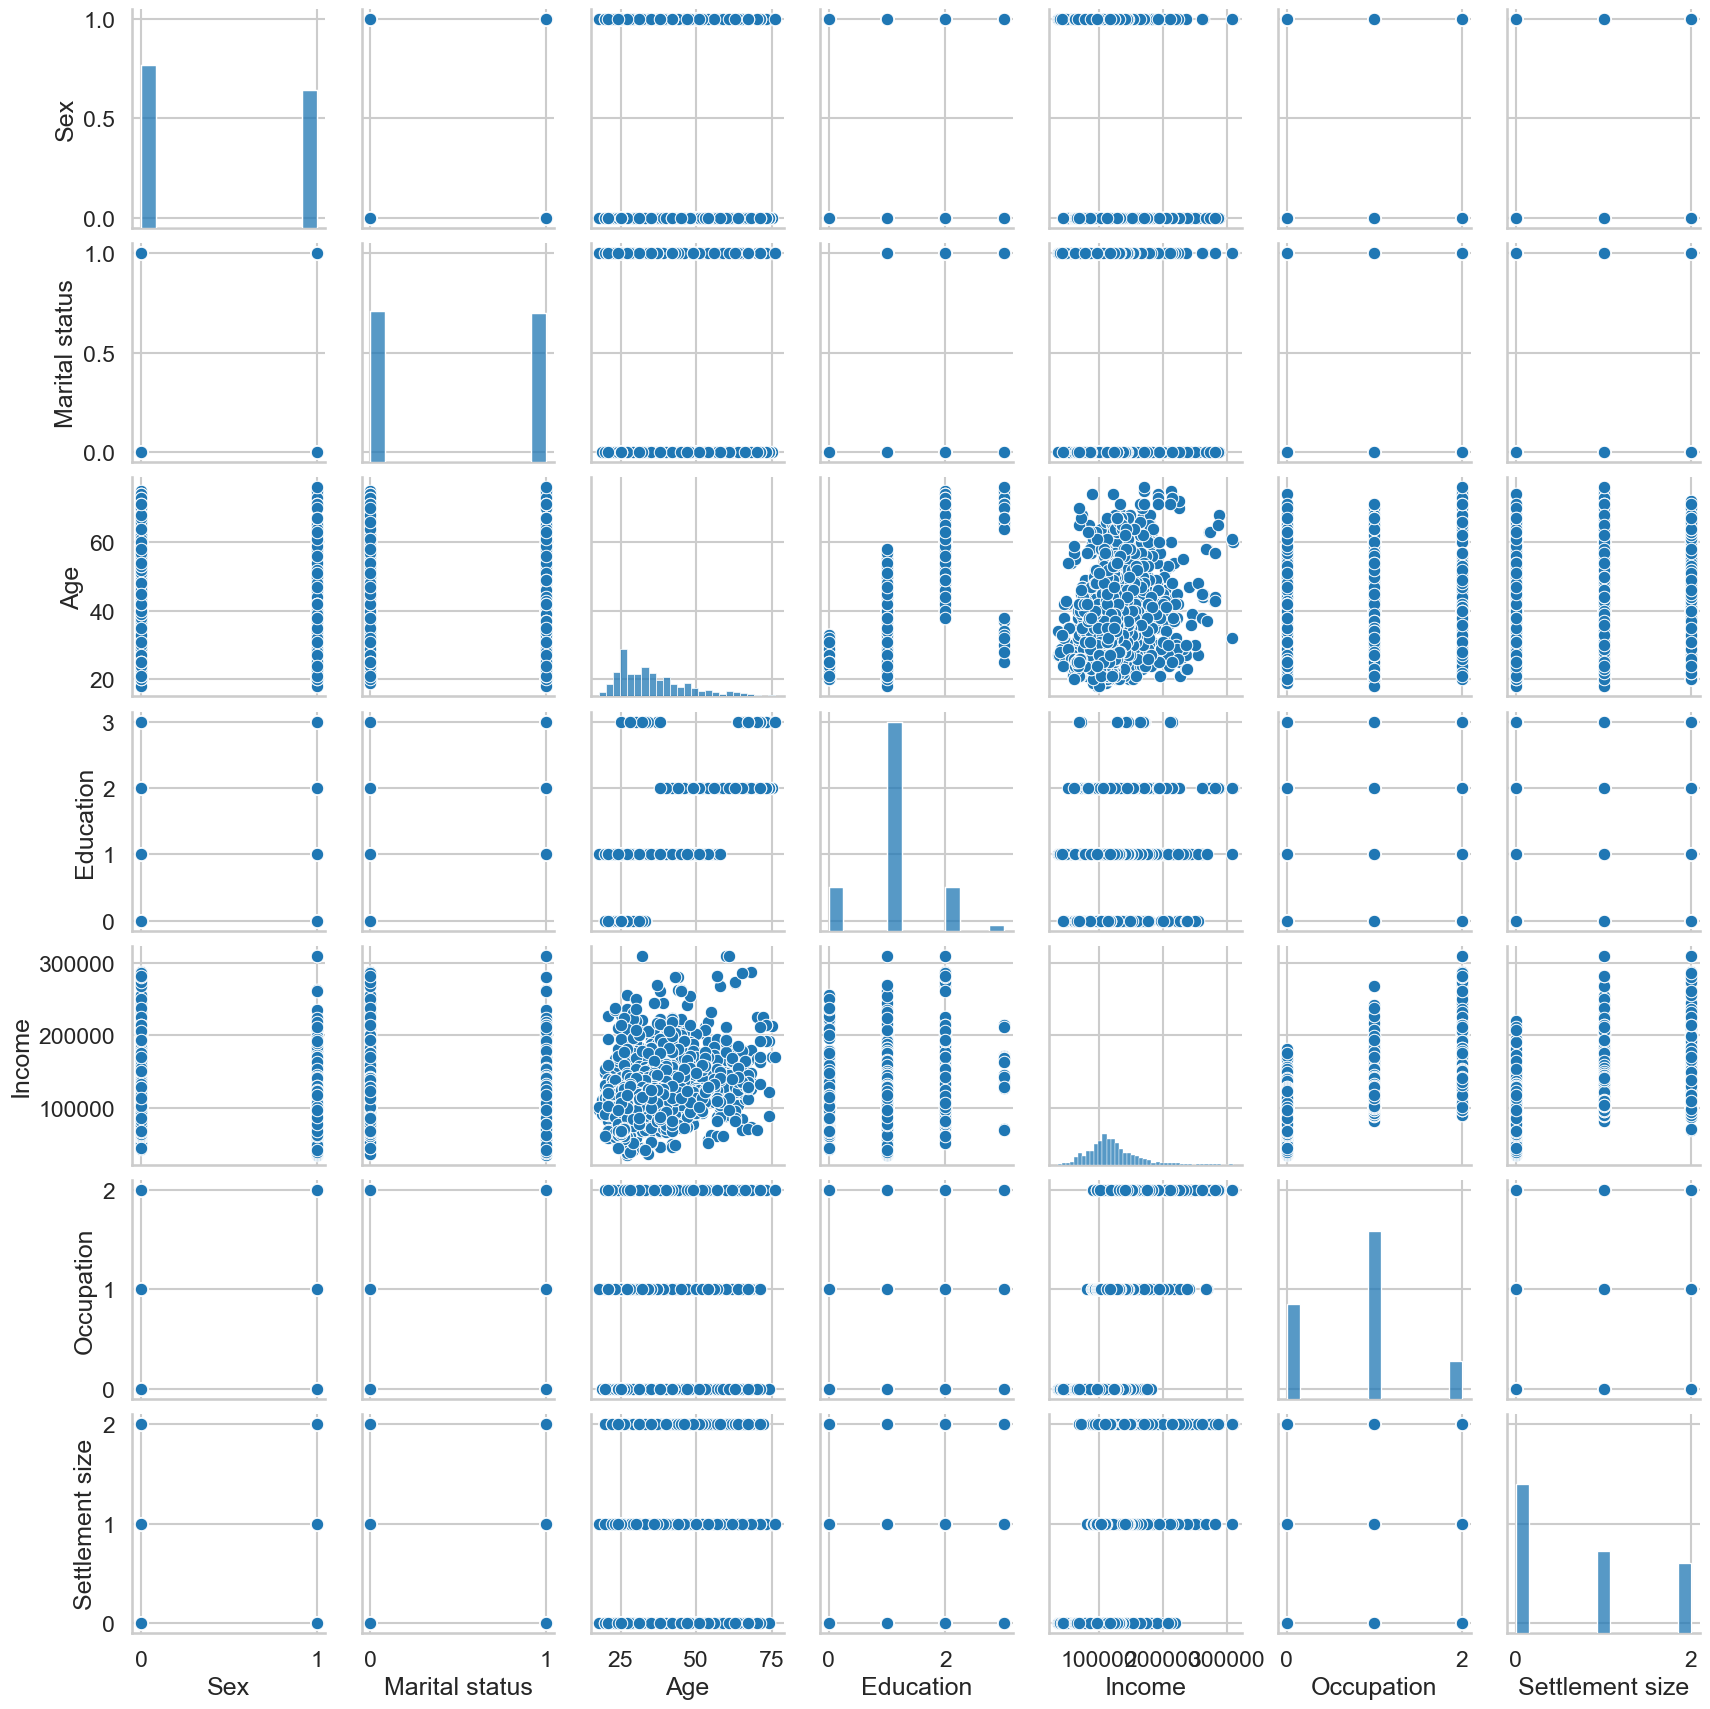

In [19]:
sns.pairplot(df)

In [20]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['Age', 'Income']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

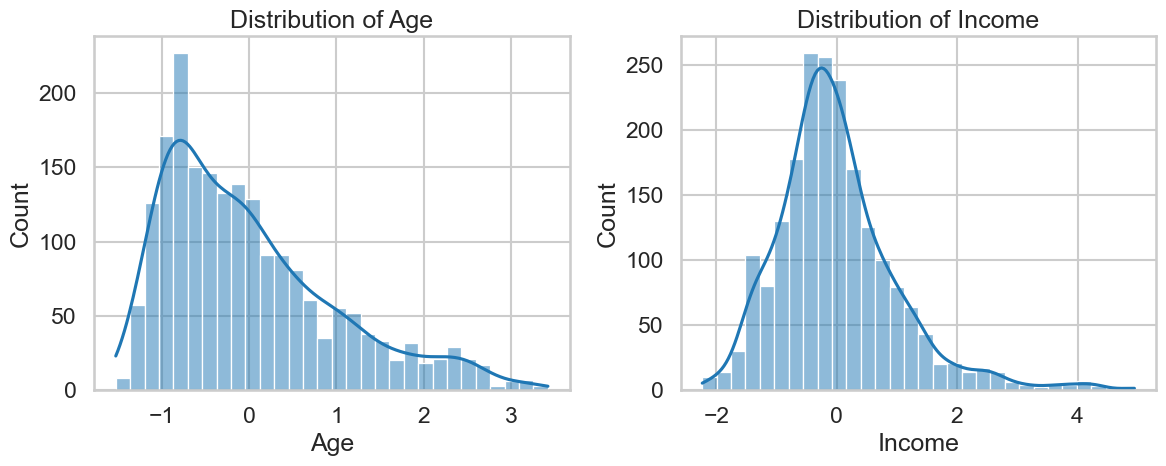

In [21]:
# Plot distribution of Age and Income
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Income')

plt.tight_layout()
plt.show()


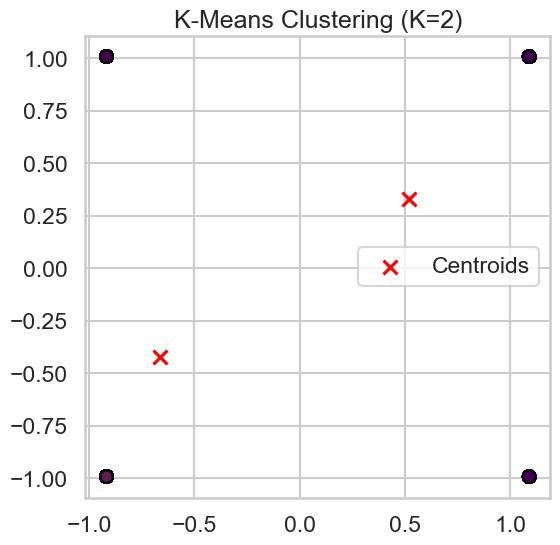

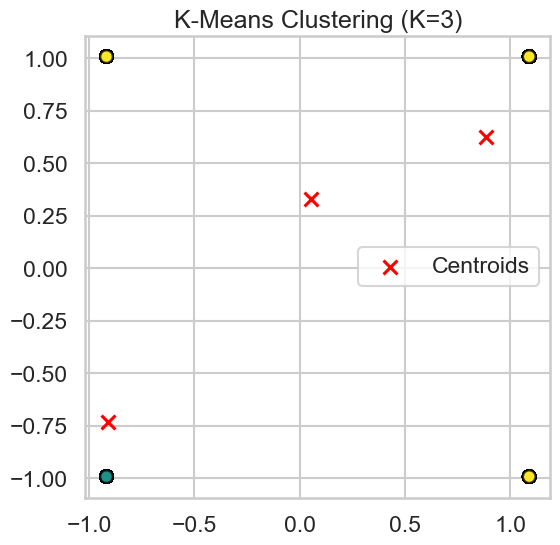

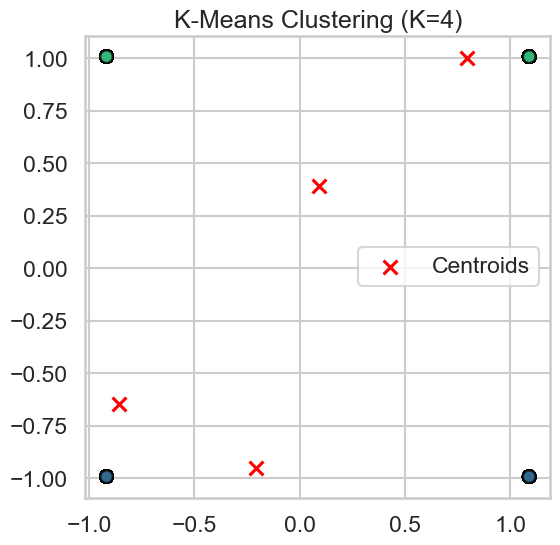

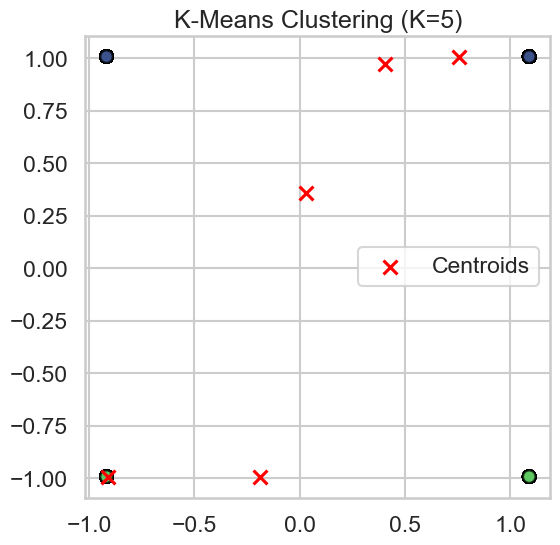

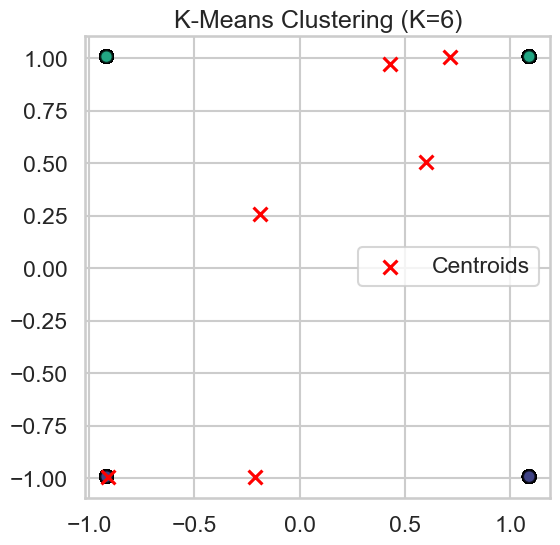

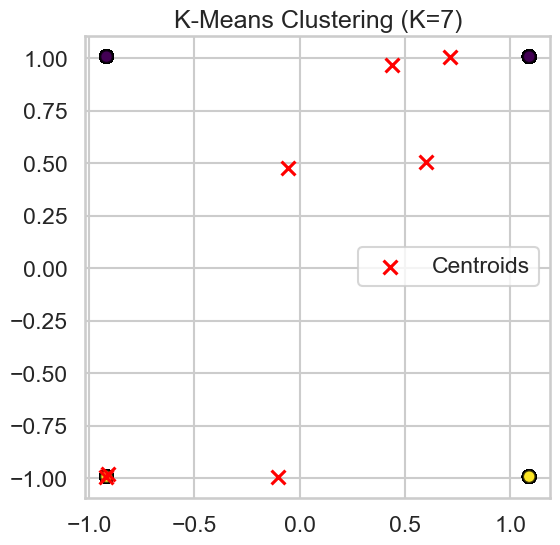

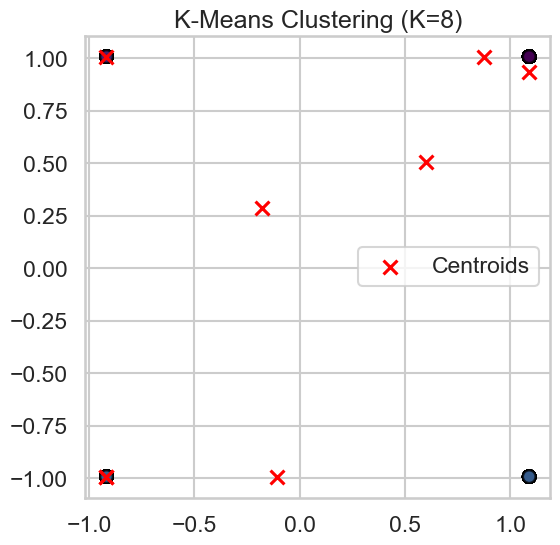

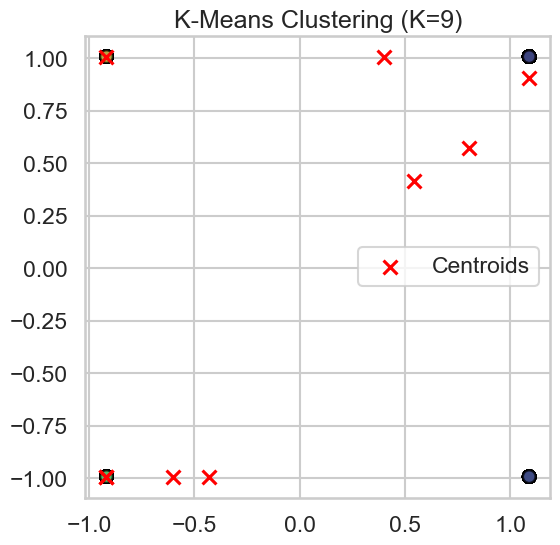

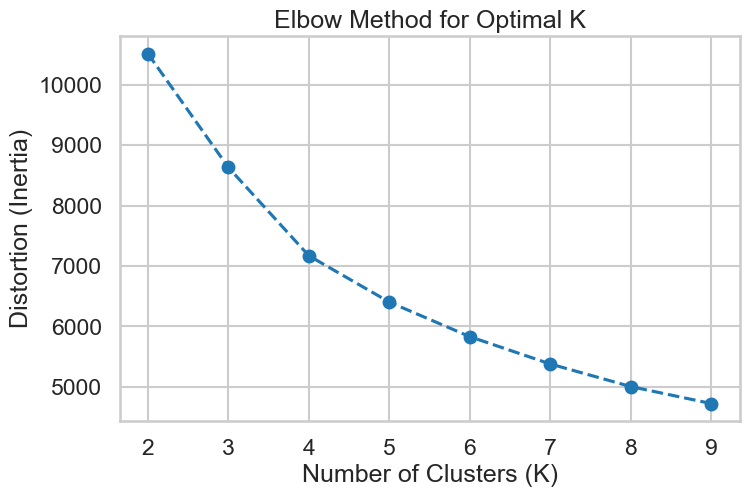

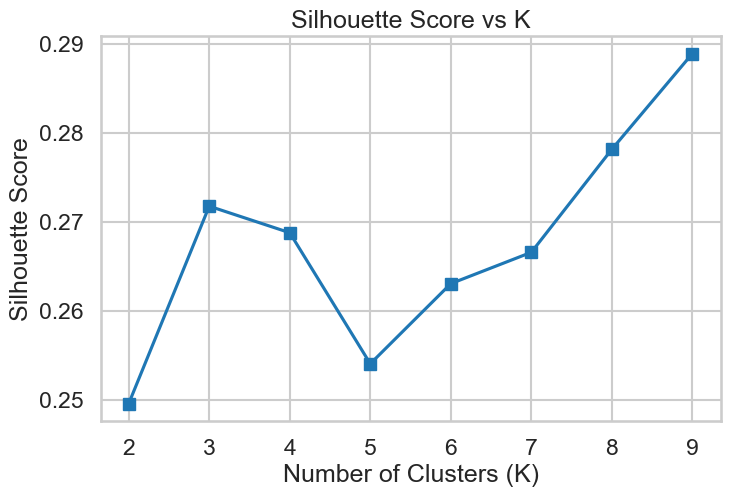

Best K: 9


In [22]:
#kmeans with scaling
from sklearn.cluster import KMeans
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
K_values = range(2, 10)
distortions = []
silhouette_scores = {}
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_df)
    
    # Compute distortion (inertia)
    distortions.append(kmeans.inertia_)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(scaled_df, labels)
    silhouette_scores[k] = silhouette_avg

    # Plot clusters
    plt.figure(figsize=(6, 6))
    plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(f'K-Means Clustering (K={k})')
    plt.legend()
    plt.show()

# Plot distortion function vs K
plt.figure(figsize=(8, 5))
plt.plot(K_values, distortions, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(K_values, list(silhouette_scores.values()), marker='s', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.show()

# Choose the best K based on silhouette score
best_K = max(silhouette_scores, key=silhouette_scores.get)
best_silhouette_score = silhouette_scores[best_K]

print(f'Best K: {best_K}')


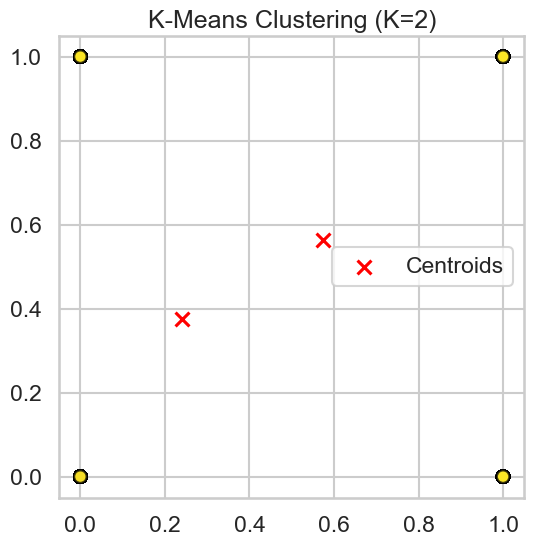

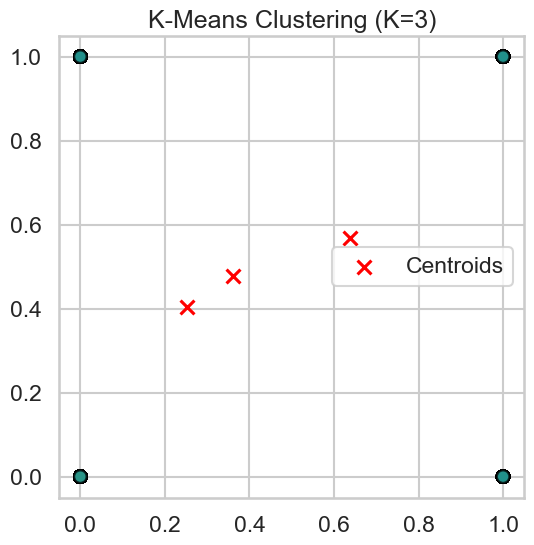

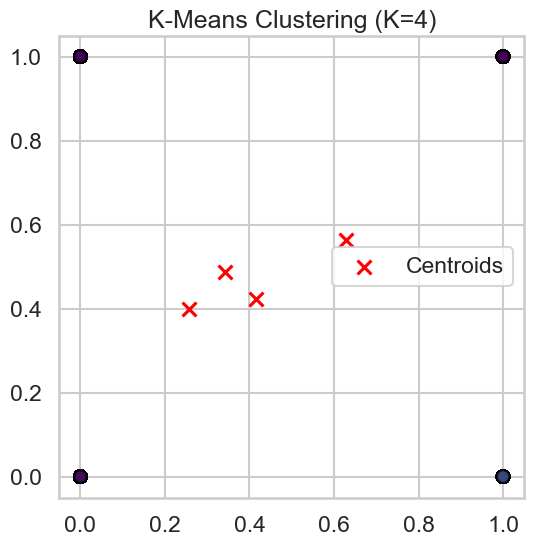

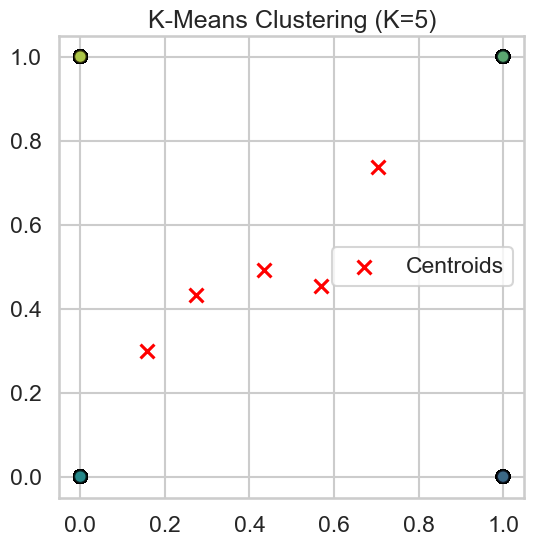

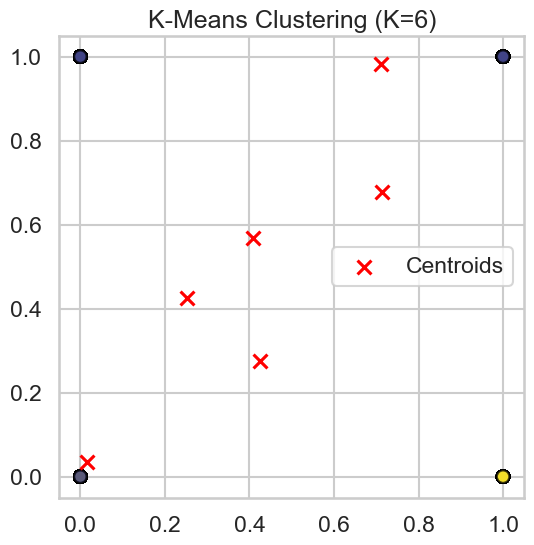

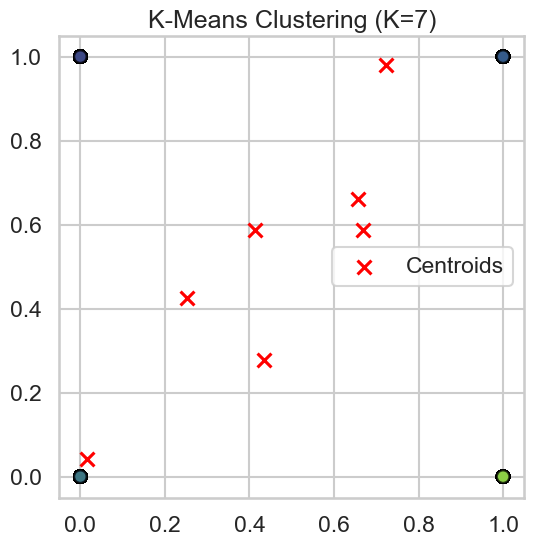

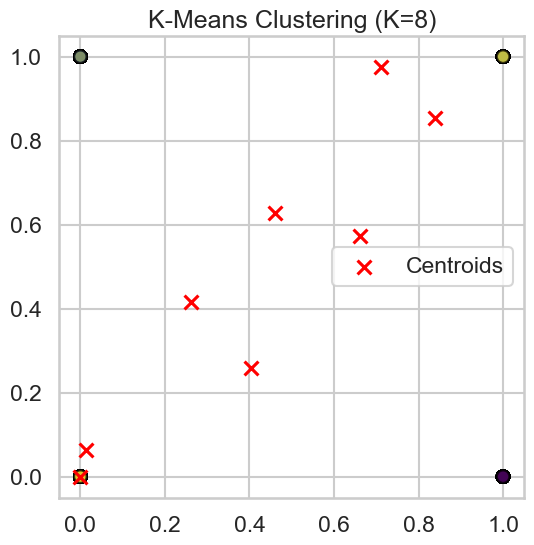

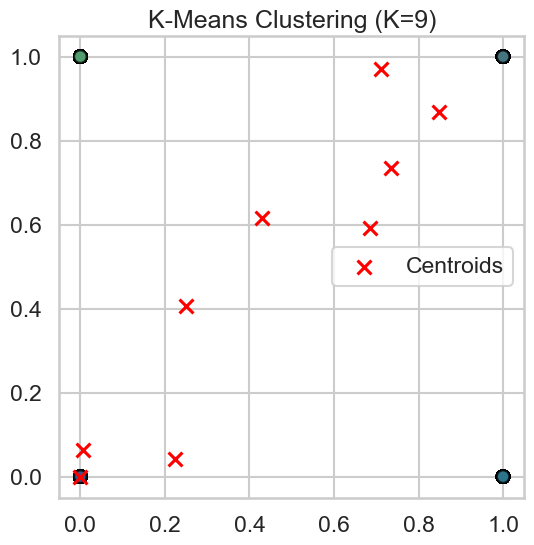

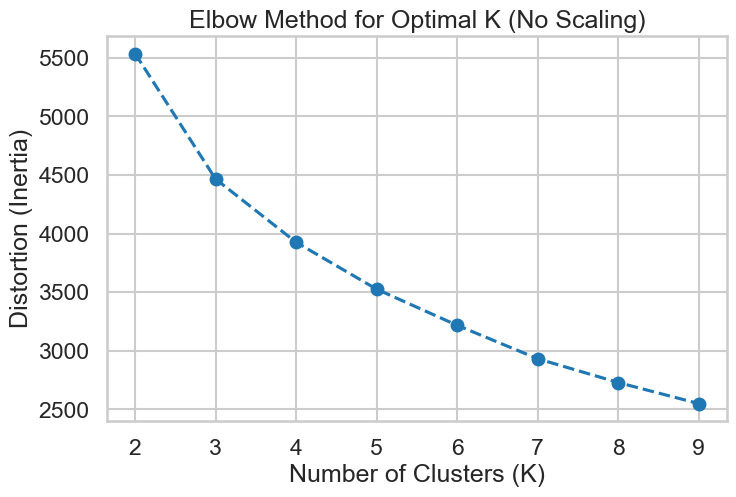

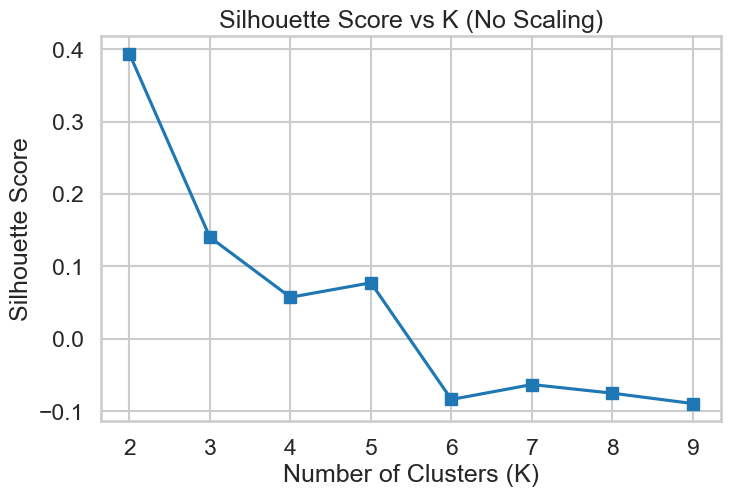

Best K (without scaling): 2


In [23]:
#kmeans without scaling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
df4 = pd.read_csv('C:/Users/DELL/Desktop/MLproject/customer_data.csv', index_col= "ID")
# No scaling applied here
K_values = range(2, 10)
distortions = []
silhouette_scores = {}

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    
    # Compute distortion (inertia)
    distortions.append(kmeans.inertia_)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df4, labels)
    silhouette_scores[k] = silhouette_avg

    # Plot clusters (works well if df has 2D or after dimensionality reduction)
    plt.figure(figsize=(6, 6))
    plt.scatter(df4.iloc[:, 0], df4.iloc[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(f'K-Means Clustering (K={k})')
    plt.legend()
    plt.show()

# Plot distortion vs K
plt.figure(figsize=(8, 5))
plt.plot(K_values, distortions, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K (No Scaling)')
plt.show()

# Plot silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(K_values, list(silhouette_scores.values()), marker='s', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K (No Scaling)')
plt.show()

# Choose best K based on silhouette score
best_K = max(silhouette_scores, key=silhouette_scores.get)
best_silhouette_score = silhouette_scores[best_K]

print(f'Best K (without scaling): {best_K}')


Error with Affinity=euclidean, Linkage=complete, Threshold=50000: (slice(None, None, None), 0)
Error with Affinity=euclidean, Linkage=complete, Threshold=51000: (slice(None, None, None), 0)
Error with Affinity=euclidean, Linkage=complete, Threshold=52000: (slice(None, None, None), 0)
Error with Affinity=euclidean, Linkage=complete, Threshold=53000: (slice(None, None, None), 0)
Error with Affinity=euclidean, Linkage=complete, Threshold=54000: (slice(None, None, None), 0)
Error with Affinity=euclidean, Linkage=complete, Threshold=55000: (slice(None, None, None), 0)
Error with Affinity=euclidean, Linkage=complete, Threshold=56000: (slice(None, None, None), 0)
Error with Affinity=euclidean, Linkage=complete, Threshold=57000: (slice(None, None, None), 0)
Error with Affinity=euclidean, Linkage=complete, Threshold=58000: (slice(None, None, None), 0)
Error with Affinity=euclidean, Linkage=complete, Threshold=59000: (slice(None, None, None), 0)
Error with Affinity=euclidean, Linkage=average, Th

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

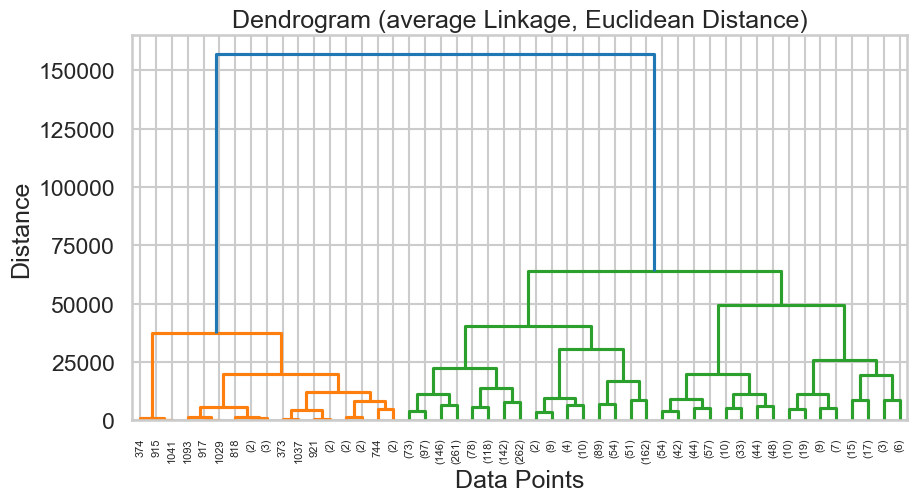

Best Parameters: Affinity=manhattan, Linkage=average, Distance Threshold=54000
Best Silhouette Score: 0.6858


In [24]:
#agglomerative without scaling
df2 = pd.read_csv('C:/Users/DELL/Desktop/MLproject/customer_data.csv', index_col= "ID")
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Define the parameters to test
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['complete', 'average', 'single']
#distance_thresholds = [5, 10, 15]  # Different distance thresholds to try
distance_thresholds = np.arange(50000, 60000, 1000).tolist()

# Store results
best_silhouette = -1
best_params = None
silhouette_scores_hierarchical = {}

# Loop through different parameter combinations
for affinity in affinities:
    for linkage_method in linkages:
        for dist_thresh in distance_thresholds:
            try:
                # Ward linkage requires Euclidean distance only
                if linkage_method == 'ward' and affinity != 'euclidean':
                    continue

                # Perform Agglomerative Clustering
                clustering = AgglomerativeClustering(
                    affinity=affinity, linkage=linkage_method, distance_threshold=dist_thresh, n_clusters=None
                )
                labels = clustering.fit_predict(df2)

                # Calculate silhouette score (only if more than 1 cluster is formed)
                if len(set(labels)) > 1:
                    score = silhouette_score(df2, labels)
                    silhouette_scores_hierarchical[(affinity, linkage_method, dist_thresh)] = score

                    # Update best parameters if a better silhouette score is found
                    if score > best_silhouette:
                        best_silhouette = score
                        best_params = (affinity, linkage_method, dist_thresh)

                # Plot clusters for this trial
                plt.figure(figsize=(6, 6))
                plt.scatter(df2[:, 0], df2[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
                plt.title(f'Agglomerative Clustering (Affinity={affinity}, Linkage={linkage_method}, Threshold={dist_thresh})')
                plt.show()

            except Exception as e:
                print(f"Error with Affinity={affinity}, Linkage={linkage_method}, Threshold={dist_thresh}: {e}")

plt.figure(figsize=(10, 5))
linked = linkage(df2, method='average')
dendrogram(linked, truncate_mode='level', p=5)  # Truncate to avoid too many leaves
plt.title('Dendrogram (average Linkage, Euclidean Distance)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Display best parameters and silhouette score
print(f"Best Parameters: Affinity={best_params[0]}, Linkage={best_params[1]}, Distance Threshold={best_params[2]}")
print(f"Best Silhouette Score: {best_silhouette:.4f}")


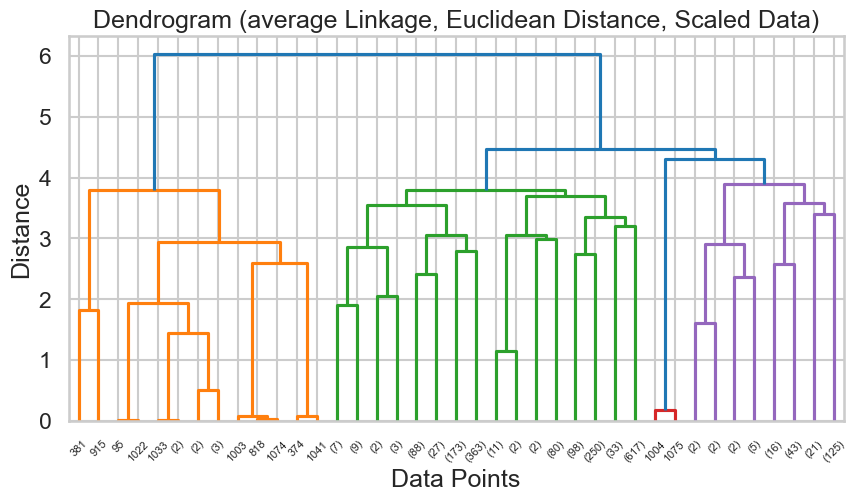

Best Parameters: Affinity=manhattan, Linkage=complete, Distance Threshold=5
Best Silhouette Score: 0.4351


In [25]:
#agglomerative with scaling
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load and scale the dataset
df2 = pd.read_csv('C:/Users/DELL/Desktop/MLproject/customer_data.csv', index_col="ID")
scaler = StandardScaler()
scaled_df2 = scaler.fit_transform(df2)

# Define parameters
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['complete', 'average', 'single']
distance_thresholds = [5, 10, 15]

# Store results
best_silhouette = -1
best_params = None
silhouette_scores_hierarchical = {}

# Loop through combinations
for affinity in affinities:
    for linkage_method in linkages:
        for dist_thresh in distance_thresholds:
            try:
                # Ward only works with Euclidean
                if linkage_method == 'ward' and affinity != 'euclidean':
                    continue

                clustering = AgglomerativeClustering(
                    affinity=affinity,
                    linkage=linkage_method,
                    distance_threshold=dist_thresh,
                    n_clusters=None
                )
                labels = clustering.fit_predict(scaled_df2)

                if len(set(labels)) > 1:
                    score = silhouette_score(scaled_df2, labels)
                    silhouette_scores_hierarchical[(affinity, linkage_method, dist_thresh)] = score

                    if score > best_silhouette:
                        best_silhouette = score
                        best_params = (affinity, linkage_method, dist_thresh)

                

            except Exception as e:
                print(f"Error with Affinity={affinity}, Linkage={linkage_method}, Threshold={dist_thresh}: {e}")

# Dendrogram (example trial)
plt.figure(figsize=(10, 5))
linked = linkage(scaled_df2, method='average')
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram (average Linkage, Euclidean Distance, Scaled Data)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Final results
if best_params:
    print(f"Best Parameters: Affinity={best_params[0]}, Linkage={best_params[1]}, Distance Threshold={best_params[2]}")
    print(f"Best Silhouette Score: {best_silhouette:.4f}")
else:
    print("No valid clustering results found.")


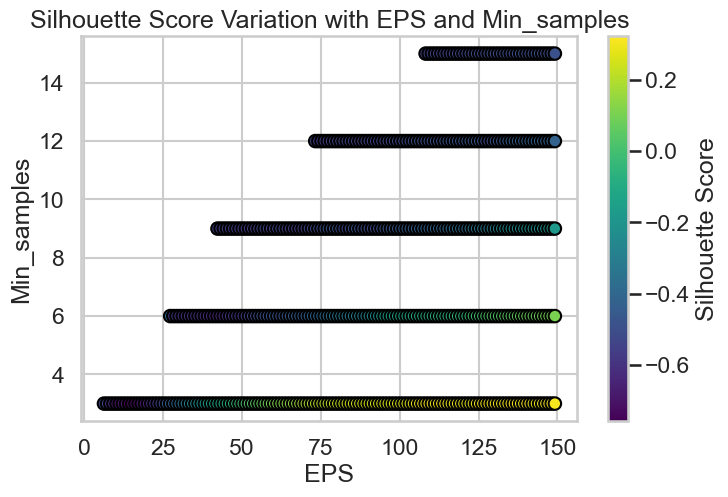

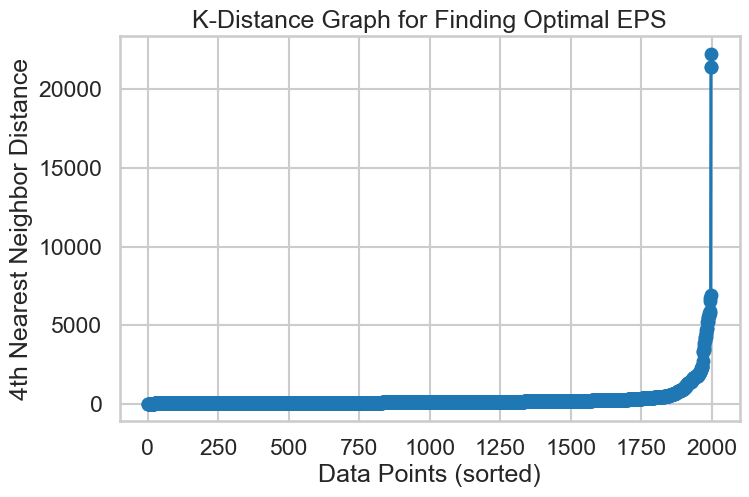

Best Parameters: EPS=137.2, Min_samples=3
Best Silhouette Score: 0.3230
Best Parameters: EPS=137.2, Min_samples=3
Best Silhouette Score: 0.3230
Number of clusters (excluding noise): 134


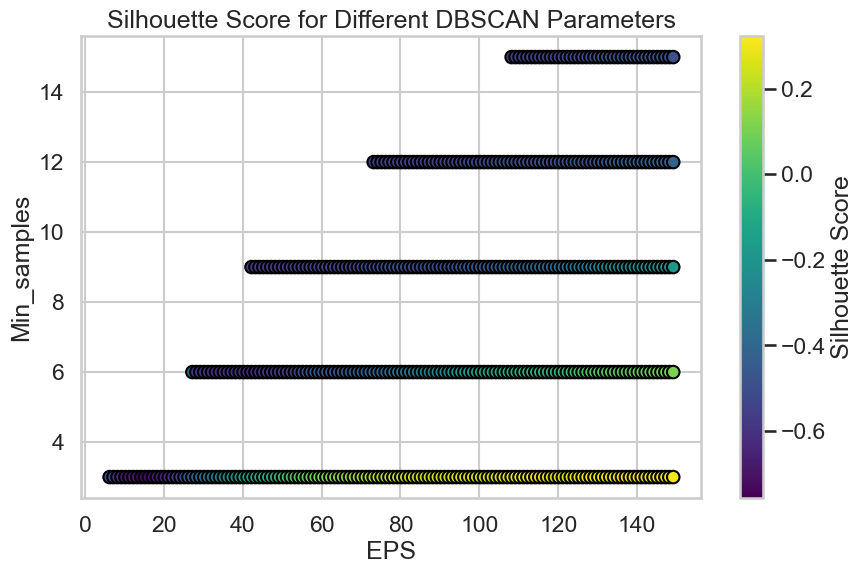

In [34]:
#dbscan without scaling
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Load dataset
df3 = pd.read_csv('C:/Users/DELL/Desktop/MLproject/customer_data.csv', index_col="ID")

# Define hyperparameter ranges
eps_values = np.arange(0.2, 150 , 1)  # EPS from 0.2 to 3.5 with step 0.3
min_samples_values = range(3, 20, 3)   # Min_samples from 3 to 18 with step 3

# Store results
best_silhouette_dbscan = 0
best_params_dbscan = None
silhouette_scores_dbscan = {}

# Loop through different parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        try:
            # Apply DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(df3)

            # Ensure DBSCAN forms at least 2 clusters (excluding noise)
            unique_labels = set(labels) - {-1}
            if len(unique_labels) > 1:
                score = silhouette_score(df3, labels)
                silhouette_scores_dbscan[(eps, min_samples)] = score

                # Update best parameters if a better silhouette score is found
                if score > best_silhouette_dbscan:
                    best_silhouette_dbscan = score
                    best_params_dbscan = (eps, min_samples)

                

        except Exception as e:
            print(f"Error with EPS={eps}, Min_samples={min_samples}: {e}")

# Plot the silhouette score vs variations in EPS and Min_samples
if silhouette_scores_dbscan:
    eps_list, min_samples_list, scores = zip(*[(eps, min_samples, score) for (eps, min_samples), score in silhouette_scores_dbscan.items()])

    fig, ax = plt.subplots(figsize=(8, 5))
    sc = ax.scatter(eps_list, min_samples_list, c=scores, cmap='viridis', marker='o', edgecolors='k')
    plt.colorbar(sc, label='Silhouette Score')
    ax.set_xlabel('EPS')
    ax.set_ylabel('Min_samples')
    ax.set_title('Silhouette Score Variation with EPS and Min_samples')
    plt.show()

# Apply K-Distance Graph method to find optimal EPS
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(df3)
distances, indices = neighbors.kneighbors(df3)
sorted_distances = np.sort(distances[:, 4])  # 4th neighbor for k-distance

plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, marker='o', linestyle='-')
plt.xlabel('Data Points (sorted)')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-Distance Graph for Finding Optimal EPS')
plt.show()

# Display best parameters and silhouette score for DBSCAN
if best_params_dbscan is not None:
    print(f"Best Parameters: EPS={best_params_dbscan[0]}, Min_samples={best_params_dbscan[1]}")
    print(f"Best Silhouette Score: {best_silhouette_dbscan:.4f}")

if best_params_dbscan is not None:
    print(f"Best Parameters: EPS={best_params_dbscan[0]}, Min_samples={best_params_dbscan[1]}")
    print(f"Best Silhouette Score: {best_silhouette_dbscan:.4f}")

    # Fit DBSCAN again with the best parameters
    best_dbscan = DBSCAN(eps=best_params_dbscan[0], min_samples=best_params_dbscan[1])
    best_labels = best_dbscan.fit_predict(df3)

    # Count number of clusters (excluding noise)
    n_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
    print(f"Number of clusters (excluding noise): {n_clusters}")


fig = plt.figure(figsize=(10, 6))
plt.scatter(eps_list, min_samples_list, c=scores, cmap='viridis', marker='o', edgecolors='k')
plt.colorbar(label='Silhouette Score')
plt.xlabel('EPS')
plt.ylabel('Min_samples')
plt.title('Silhouette Score for Different DBSCAN Parameters')
plt.show()


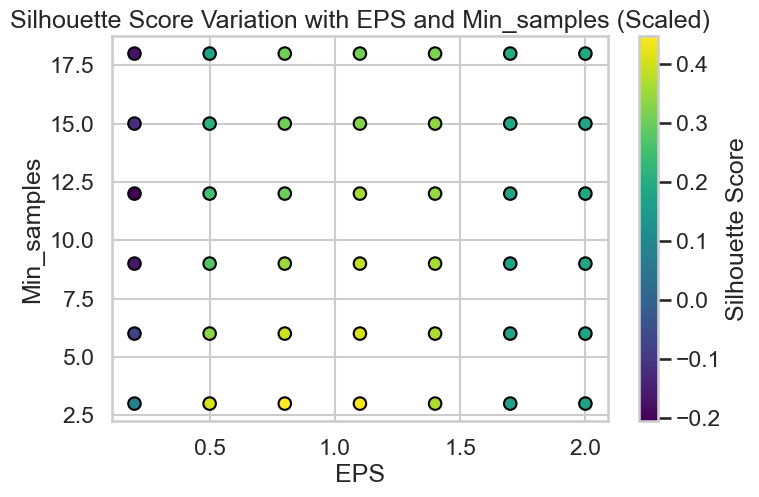

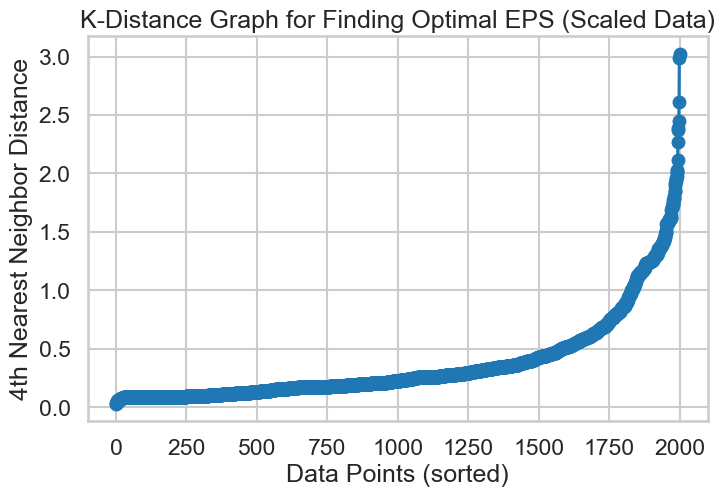

Best Parameters: EPS=0.8, Min_samples=3
Best Silhouette Score: 0.4468
Number of clusters (excluding noise): 0
Number of clusters (including noise): 1


In [35]:
#dbscan with scaling
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Load and scale dataset
df3 = pd.read_csv('C:/Users/DELL/Desktop/MLproject/customer_data.csv', index_col="ID")
scaler = StandardScaler()
scaled_df3 = scaler.fit_transform(df3)

# Define hyperparameter ranges
eps_values = np.arange(0.2, 3.5, 0.3)
min_samples_values = range(3, 20, 3)

# Store results
best_silhouette_dbscan = 0
best_params_dbscan = None
silhouette_scores_dbscan = {}

# Loop through parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        try:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(scaled_df3)

            unique_labels = set(labels) - {-1}
            if len(unique_labels) > 1:
                score = silhouette_score(scaled_df3, labels)
                silhouette_scores_dbscan[(eps, min_samples)] = score

                if score > best_silhouette_dbscan:
                    best_silhouette_dbscan = score
                    best_params_dbscan = (eps, min_samples)

               

        except Exception as e:
            print(f"Error with EPS={eps}, Min_samples={min_samples}: {e}")

# Plot silhouette score variation
if silhouette_scores_dbscan:
    eps_list, min_samples_list, scores = zip(*[(eps, min_samples, score) for (eps, min_samples), score in silhouette_scores_dbscan.items()])

    fig, ax = plt.subplots(figsize=(8, 5))
    sc = ax.scatter(eps_list, min_samples_list, c=scores, cmap='viridis', marker='o', edgecolors='k')
    plt.colorbar(sc, label='Silhouette Score')
    ax.set_xlabel('EPS')
    ax.set_ylabel('Min_samples')
    ax.set_title('Silhouette Score Variation with EPS and Min_samples (Scaled)')
    plt.show()

# K-Distance Graph for optimal EPS (scaled)
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(scaled_df3)
distances, indices = neighbors.kneighbors(scaled_df3)
sorted_distances = np.sort(distances[:, 4])

plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, marker='o', linestyle='-')
plt.xlabel('Data Points (sorted)')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-Distance Graph for Finding Optimal EPS (Scaled Data)')
plt.show()

if best_params_dbscan is not None:
    print(f"Best Parameters: EPS={best_params_dbscan[0]}, Min_samples={best_params_dbscan[1]}")
    print(f"Best Silhouette Score: {best_silhouette_dbscan:.4f}")

    # Fit DBSCAN again with the best parameters
    best_dbscan = DBSCAN(eps=best_params_dbscan[0], min_samples=best_params_dbscan[1])
    best_labels = best_dbscan.fit_predict(df3)

    # Clusters excluding noise
    n_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
    print(f"Number of clusters (excluding noise): {n_clusters}")

    # Clusters including noise
    n_clusters_including_noise = len(set(best_labels))
    print(f"Number of clusters (including noise): {n_clusters_including_noise}")

else:
    print("No valid DBSCAN parameters found that formed at least two clusters!")


for the customer dataset agglomerative clustering without scaling gave the highest silhouette score.

Best EPS: 59.1, Best Min_samples: 5, Best Silhouette Score: -0.38292345442310455 , Number of Clusters: 84
{(21.1, 5): 3, (22.1, 5): 3, (23.1, 5): 4, (24.1, 5): 5, (25.1, 5): 11, (26.1, 5): 13, (27.1, 5): 15, (27.1, 6): 2, (28.1, 5): 16, (28.1, 6): 4, (29.1, 5): 17, (29.1, 6): 4, (30.1, 5): 20, (30.1, 6): 6, (31.1, 5): 22, (31.1, 6): 6, (31.1, 7): 2, (32.1, 5): 25, (32.1, 6): 6, (32.1, 7): 2, (33.1, 5): 27, (33.1, 6): 9, (33.1, 7): 4, (34.1, 5): 33, (34.1, 6): 11, (34.1, 7): 4, (35.1, 5): 34, (35.1, 6): 13, (35.1, 7): 4, (36.1, 5): 37, (36.1, 6): 13, (36.1, 7): 5, (37.1, 5): 39, (37.1, 6): 14, (37.1, 7): 5, (38.1, 5): 41, (38.1, 6): 15, (38.1, 7): 5, (39.1, 5): 41, (39.1, 6): 15, (39.1, 7): 5, (39.1, 8): 2, (40.1, 5): 44, (40.1, 6): 16, (40.1, 7): 6, (40.1, 8): 3, (41.1, 5): 45, (41.1, 6): 18, (41.1, 7): 6, (41.1, 8): 3, (42.1, 5): 45, (42.1, 6): 20, (42.1, 7): 6, (42.1, 8): 3, (42.1, 9): 2, (43.1, 5): 46, (43.1, 6): 21, (43.1, 7): 6, (43.1, 8): 3, (43.1, 9): 2, (44.1, 5): 50, (44.1, 6)

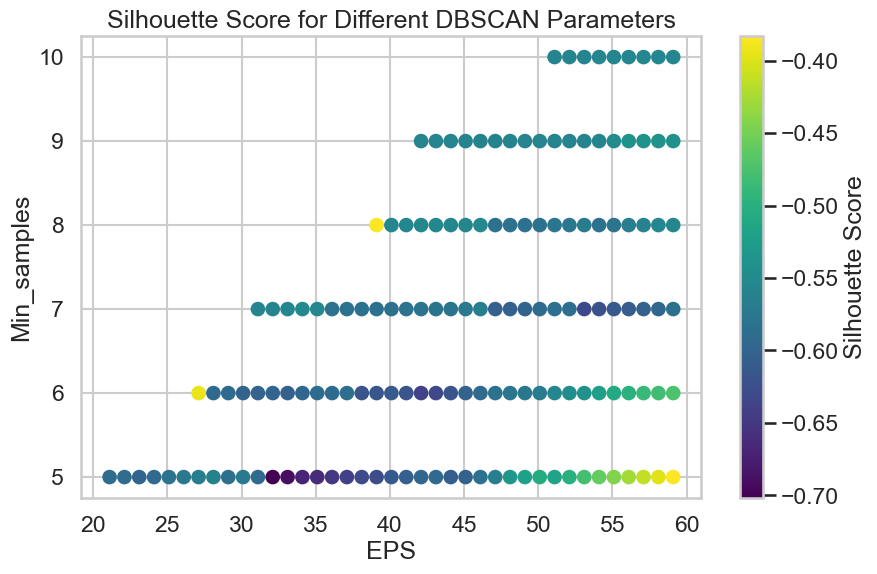

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
df3 = pd.read_csv('C:/Users/DELL/Desktop/MLproject/customer_data.csv', index_col="ID")

# Range of EPS and Min_samples values to test
eps_values = np.arange(0.1, 60, 1)
min_samples_values = range(5, 26)  # From 5 to 25

best_score = -1
best_params = None
best_labels = None
best_model = None
num_clusters_dict = {}

# Loop over different combinations of EPS and Min_samples
silhouette_scores = []
param_combinations = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df3)
        
        # Count number of clusters (excluding noise)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        # Only evaluate silhouette score if there are at least 2 clusters
        if num_clusters > 1:
            score = silhouette_score(df3, labels)
            silhouette_scores.append(score)
            param_combinations.append((eps, min_samples))
            num_clusters_dict[(eps, min_samples)] = num_clusters
            
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples,num_clusters)
                best_labels = labels
                best_model = dbscan

# Extracting the best parameters
if best_params is not None:
    eps_best, min_samples_best, num_clusters = best_params
    print(f"Best EPS: {eps_best}, Best Min_samples: {min_samples_best}, Best Silhouette Score: {best_score} , Number of Clusters: {num_clusters}")
else:
    print("No valid clustering found. Try adjusting `eps` or scaling the data.")

print(num_clusters_dict)

eps_best, min_samples_best,num_clusters = best_params
print(f"Best EPS: {eps_best}, Best Min_samples: {min_samples_best}, Best Silhouette Score: {best_score} , Number of Clusters: {num_clusters}")

# Plot silhouette scores
fig = plt.figure(figsize=(10, 6))
plt.scatter([p[0] for p in param_combinations], [p[1] for p in param_combinations], c=silhouette_scores, cmap='viridis', marker='o')
plt.colorbar(label='Silhouette Score')
plt.xlabel('EPS')
plt.ylabel('Min_samples')
plt.title('Silhouette Score for Different DBSCAN Parameters')
plt.show()


Best EPS: 1.2, Best Min_samples: 5, Best Silhouette Score: 0.4225606832617899 , Number of Clusters: 51


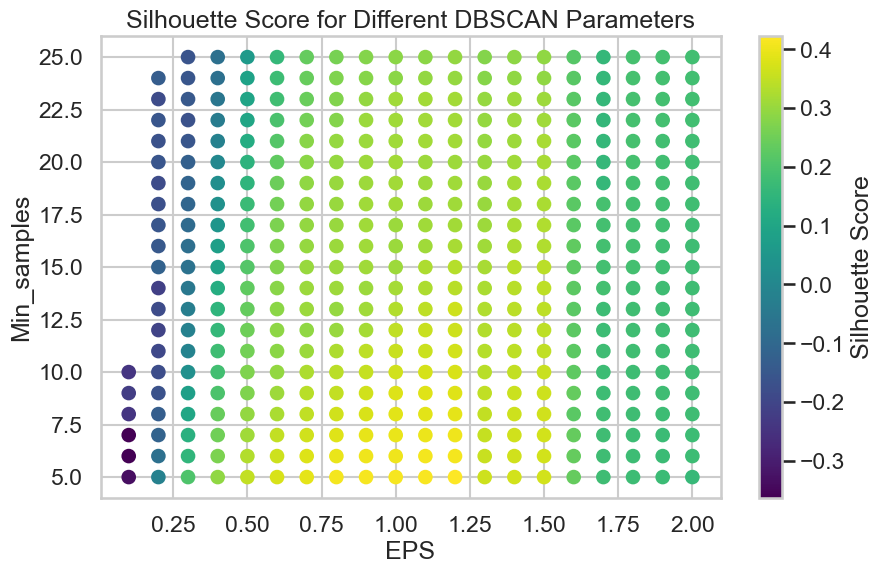

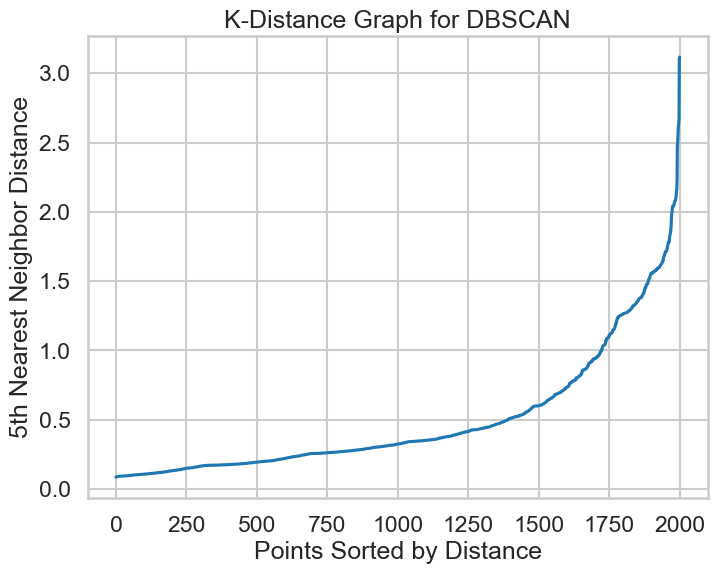

Optimal EPS (from K-Distance Graph): 1.2653460494154927


In [42]:
#DBSCAN ON Customer Data on Scaled Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
df3 = pd.read_csv('C:/Users/DELL/Desktop/MLproject/customer_data.csv', index_col="ID")
scaler = StandardScaler()
scaled_df3 = scaler.fit_transform(df3)

# Range of EPS and Min_samples values to test
eps_values = np.linspace(0.1, 3, 30)  # 30 values from 0.1 to 3
min_samples_values = range(5, 26)  # From 5 to 25

best_score = -1
best_params = None
best_labels = None
best_model = None
num_clusters_dict = {}

# Loop over different combinations of EPS and Min_samples
silhouette_scores = []
param_combinations = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_df3)
        
        # Count number of clusters (excluding noise)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        # Only evaluate silhouette score if there are at least 2 clusters
        if num_clusters > 1:
            score = silhouette_score(scaled_df3, labels)
            silhouette_scores.append(score)
            param_combinations.append((eps, min_samples))
            num_clusters_dict[(eps, min_samples)] = num_clusters
            
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples,num_clusters)
                best_labels = labels
                best_model = dbscan

# Extracting the best parameters
eps_best, min_samples_best,num_clusters = best_params
print(f"Best EPS: {eps_best}, Best Min_samples: {min_samples_best}, Best Silhouette Score: {best_score} , Number of Clusters: {num_clusters}")

# Plot silhouette scores
fig = plt.figure(figsize=(10, 6))
plt.scatter([p[0] for p in param_combinations], [p[1] for p in param_combinations], c=silhouette_scores, cmap='viridis', marker='o')
plt.colorbar(label='Silhouette Score')
plt.xlabel('EPS')
plt.ylabel('Min_samples')
plt.title('Silhouette Score for Different DBSCAN Parameters')
plt.show()



# K-Distance Graph Method
neigh = NearestNeighbors(n_neighbors=8)
neigh.fit(scaled_df3)
distances, indices = neigh.kneighbors(scaled_df3)

# Sort and plot the distances
sorted_distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 6))
plt.plot(sorted_distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('K-Distance Graph for DBSCAN')
plt.show()

# Elbow point estimation (approximate optimal EPS)
knee_eps = sorted_distances[int(len(sorted_distances) * 0.9)]
print(f"Optimal EPS (from K-Distance Graph): {knee_eps}")